### Personal Activity Tracking Data Analysis
#### by Ivaylo Pavlov (Last Updated 12 Feb 2017)
- Data from iPhone 6S+ (25/09/2015 - 11/03/2016)
- Garmin Vivosmart HR (11/03/2016 - 24/11/2016) 
- Apple Watch 2 (25/11/2016 - Present) 
- CSVs exported using QS Access App

In [1]:
#Generic Imports and Display Settings
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.patches as mpatches, warnings
import seaborn as sns, scipy.stats as ss, matplotlib.mlab as mlab
warnings.filterwarnings('ignore')

%pylab inline
plt.rc("savefig", dpi=200)
matplotlib.style.use('ggplot')

pd.set_option('display.max_colwidth',80)

Populating the interactive namespace from numpy and matplotlib


#### Import and clean the daily data and transform the heart rate intraday data for use

In [4]:
#Import the CSV files with the daily and intraday data
raw_daily_data = pd.read_csv("Health Data-daily.csv")
raw_intraday = pd.read_csv('Health Data-intraday.csv')
raw_sleep_data = pd.read_csv('Sleep Analysis.csv')

#Extract only the heart rate from the intraday data and the delete the rest, add a day only column
raw_intraday_data = raw_intraday.copy()
raw_intraday_data.index = raw_intraday_data['Start']
raw_intraday_data = raw_intraday_data.ix[:,'Heart Rate (count/min)']
raw_intraday_data = pd.DataFrame(raw_intraday_data)
raw_intraday_data.index = pd.to_datetime(raw_intraday_data.index)
raw_intraday_data = raw_intraday_data.ix[raw_intraday_data.index>'11-Mar-2016 18:00']
raw_intraday_data = raw_intraday_data.replace(0, np.nan)
raw_intraday_data = raw_intraday_data.dropna(axis=0)
raw_intraday_data['Date'] = raw_intraday_data.index.date
hr_intraday = raw_intraday_data

#Extract only the steps from the intraday data and the delete the rest, add a day only column
raw_intraday_data2 = raw_intraday.copy()
raw_intraday_data2 = raw_intraday_data2.ix[:,('Start','Finish','Steps (count)')]
raw_intraday_data2 = pd.DataFrame(raw_intraday_data2)
raw_intraday_data2.index = pd.to_datetime(raw_intraday_data2['Start'])
#raw_intraday_data2 = raw_intraday_data2.ix[raw_intraday_data2.index>'11-Mar-2016 18:00']
raw_intraday_data2 = raw_intraday_data2.replace(0, np.nan)
raw_intraday_data2 = raw_intraday_data2.dropna(axis=0)
raw_intraday_data2['Date'] = raw_intraday_data2.index.date
raw_intraday_data2['Hour'] = raw_intraday_data2.index.time
raw_intraday_data2['Weekday'] = pd.DatetimeIndex(raw_intraday_data2['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data2['Weekday'] = raw_intraday_data2['Weekday'].apply(lambda x: days[x])
steps_intraday = raw_intraday_data2

#Extract only the heart rate from the intraday data and the delete the rest, add a day only column
raw_intraday_data3 = raw_intraday.copy()
raw_intraday_data3 = raw_intraday_data3.ix[:,('Start','Finish','Heart Rate (count/min)')]
raw_intraday_data3 = pd.DataFrame(raw_intraday_data3)
raw_intraday_data3.index = pd.to_datetime(raw_intraday_data3['Start'])
raw_intraday_data3 = raw_intraday_data3.ix[raw_intraday_data3.index>'11-Mar-2016 18:00']
raw_intraday_data3 = raw_intraday_data3.replace(0, np.nan)
raw_intraday_data3 = raw_intraday_data3.dropna(axis=0)
raw_intraday_data3['Date'] = raw_intraday_data3.index.date
raw_intraday_data3['Hour'] = raw_intraday_data3.index.time
raw_intraday_data3['Weekday'] = pd.DatetimeIndex(raw_intraday_data3['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data3['Weekday'] = raw_intraday_data3['Weekday'].apply(lambda x: days[x])
hr_intraday2 = raw_intraday_data3

#Clean up the sleep data and aggregate by day and add a weekday to the table
raw_sleep_data2 = raw_sleep_data.ix[:,["In bed Finish","Minutes in bed"]]
raw_sleep_data2.index = pd.to_datetime(raw_sleep_data2["In bed Finish"])
raw_sleep_data2.index = raw_sleep_data2.index.date
raw_sleep_data2 = raw_sleep_data2.drop("In bed Finish", axis=1)
raw_sleep_data2 = raw_sleep_data2.groupby(raw_sleep_data2.index).agg('sum')
raw_sleep_data2['Hours in bed'] = raw_sleep_data2['Minutes in bed']/60
raw_sleep_data2 = raw_sleep_data2.drop("Minutes in bed", axis=1)
raw_sleep_data2['Weekday'] = pd.DatetimeIndex(raw_sleep_data2.index).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_sleep_data2['Weekday'] = raw_sleep_data2['Weekday'].apply(lambda x: days[x])

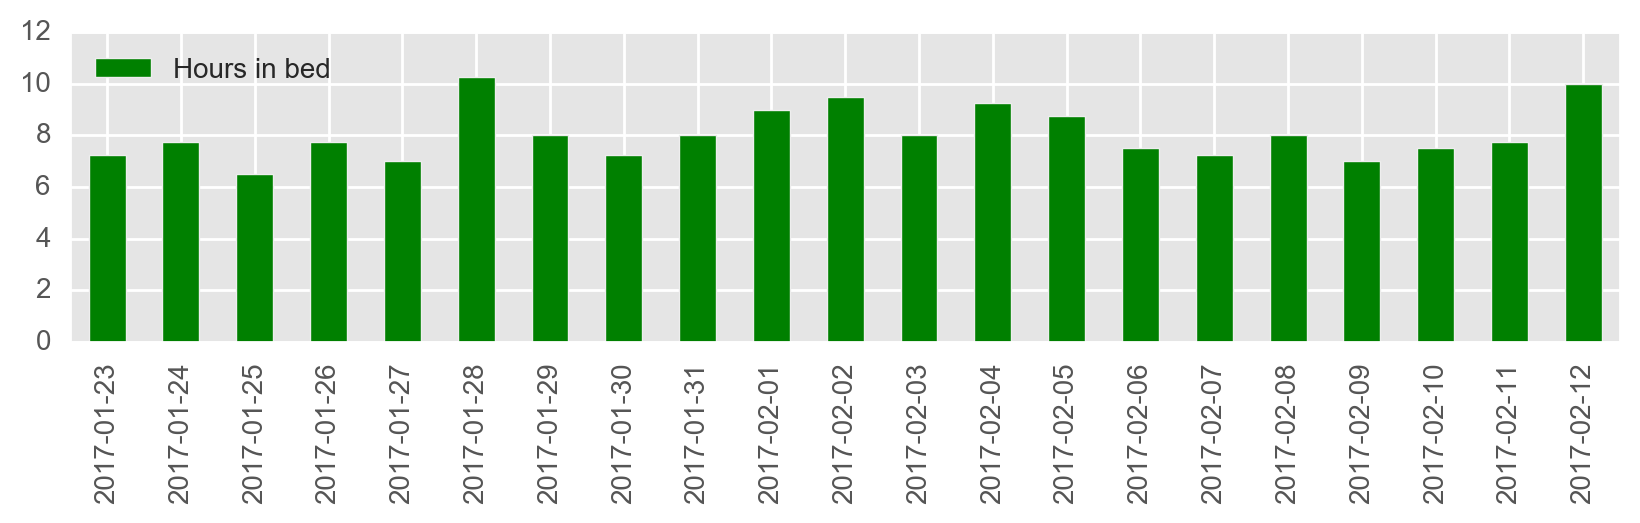

In [40]:
#Daily amount of sleep
raw_sleep_data2.plot.bar(color='g',figsize=(10,2))

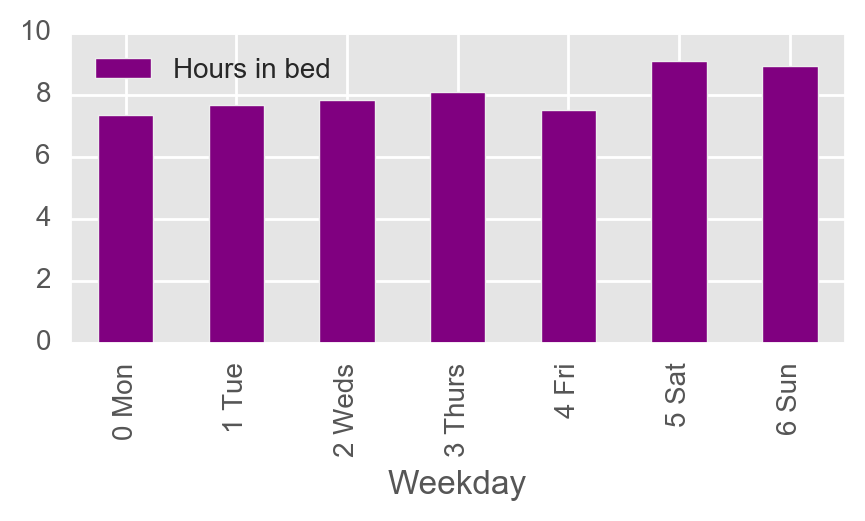

In [60]:
# Average sleep per weekday
raw_sleep_data2.groupby("Weekday").agg('mean').plot.bar(color='purple',figsize=(5,2))

#### Delete all the zero columns, set table index and delete the useless columns and add Total Calories and Weekday columns to DataSet

In [3]:
data = raw_daily_data.ix[:, (raw_daily_data != 0).any(axis=0)]
data = data.set_index(pd.DatetimeIndex(data['Start']))
data = data.drop(['Start','Finish'],axis=1)

data['Total Calories (kcal)'] = data['Active Calories (kcal)'] + data['Resting Calories (kcal)']
data['Weekday'] = data.index.dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
data['Weekday'] = data['Weekday'].apply(lambda x: days[x])

In [4]:
#Get table stats - rows and columns
print "ROWS OF DATA / DAILY: " + str(raw_daily_data.shape[0]) + " / INTRADAY: " + str(hr_intraday.shape[0])
print ""
data.tail(7)

ROWS OF DATA / DAILY: 550 / INTRADAY: 4859



Active Calories (kcal)  Blood Glucose (mg/dL)  \
2017-01-30              392.934000                    0.0   
2017-01-31              323.878000                    0.0   
2017-02-01              364.174000                    0.0   
2017-02-02              482.395000                    0.0   
2017-02-03              379.030557                    0.0   
2017-02-04              281.415443                    0.0   
2017-02-05              164.981000                    0.0   

            Blood Pressure (Diastolic) (mmHg)  \
2017-01-30                                0.0   
2017-01-31                                0.0   
2017-02-01                                0.0   
2017-02-02                                0.0   
2017-02-03                                0.0   
2017-02-04                                0.0   
2017-02-05                                0.0   

            Blood Pressure (Systolic) (mmHg)  Body Fat Percentage (%)  \
2017-01-30                               0.0                    0.000   
2017-01-31                               0.0                    0.000   
2017-02-01                               0.0                    0.000   
2017-02-02                               0.0                    0.000   
2017-02-03                               0.0                    0.000   
2017-02-04                               0.0                    0.000   
2017-02-05                               0.0                    0.107   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2017-01-30                 0.000000       6.696481                     12.0   
2017-01-31                 0.000000       5.616030                      7.0   
2017-02-01                 0.000000       6.827765                      5.0   
2017-02-02                 0.000000       8.312047                     10.0   
2017-02-03                 0.000000       6.998542                      9.0   
2017-02-04                 0.000000       4.909265                      2.0   
2017-02-05                17.799999       2.091209                      4.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2017-01-30                   113.0              0.00000   
2017-01-31                   112.0              0.00000   
2017-02-01                   102.0              0.00000   
2017-02-02                   174.0              0.00000   
2017-02-03                   114.0              0.00000   
2017-02-04                   129.0              0.00000   
2017-02-05                   124.0             49.32039   

            Oxygen Saturation (%)  Resting Calories (kcal)  Steps (count)  \
2017-01-30                    0.0              1546.683370    8338.000000   
2017-01-31                    0.0              1544.172190    7045.000000   
2017-02-01                    0.0              1530.128661    8553.937062   
2017-02-02                    0.0              1537.148578    9995.054017   
2017-02-03                    0.0              1538.357083    8912.000000   
2017-02-04                    0.0              1538.013608    6113.841621   
2017-02-05                    0.0              1277.645990    2633.000000   

            Weight (kg)  Total Calories (kcal)  Weekday  
2017-01-30         0.00            1939.617370    0 Mon  
2017-01-31         0.00            1868.050190    1 Tue  
2017-02-01         0.00            1894.302661   2 Weds  
2017-02-02         0.00            2019.543578  3 Thurs  
2017-02-03         0.00            1917.387639    4 Fri  
2017-02-04         0.00            1819.429051    5 Sat  
2017-02-05        55.23            1442.626990    6 Sun

#### Clean up WEIGHT data, Fill previous values for the Weight-related data and remove starting NA rows (Weight, BMI, Body Fat %, Lean Body Mass)

In [5]:
data.ix[:,'Body Fat Percentage (%)'] *= 100 #Scale Body Fat Percentage (%) by 100
data.ix[:,'Weight (kg)'] = data.ix[:,'Weight (kg)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Fat Percentage (%)'] = data.ix[:,'Body Fat Percentage (%)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Mass Index (count)'] = data.ix[:,'Body Mass Index (count)'].replace(to_replace=0, method='ffill')
data.ix[:,'Lean Body Mass (kg)'] = data.ix[:,'Lean Body Mass (kg)'].replace(to_replace=0, method='ffill')
data_for_weight = data[np.isfinite(data['Weight (kg)'])]
data_for_weight = data_for_weight.ix[:,['Weight (kg)','Lean Body Mass (kg)','Body Fat Percentage (%)','Body Mass Index (count)']]
data_for_weight = data_for_weight.ix[data_for_weight.index>'2016-03-28']
print "Rows remaining with Weight data: " + str(len(data_for_weight))

Rows remaining with Weight data: 314


#### Clean up STEPS, FLIGHTS CLIMBED, DISTANCE data, Setting all days with less than 550 steps or less than 0.400 km as NaN (haven't worn the tracker or battery died)

In [6]:
print "Rows before clean up: " + str(len(data))
data_for_steps = data
data_for_steps.ix[data_for_steps.ix[:,'Steps (count)']<550,'Steps (count)'] = np.nan
data_for_steps.ix[data_for_steps.ix[:,'Distance (km)']<0.400,'Distance (km)'] = np.nan
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Steps (count)'])]
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Distance (km)'])]
print "Rows lost after clean up: " + " " + str(len(data)-len(data_for_steps.index))
print "Rows after clean up: " + " " + str(len(data_for_steps.index))
data_for_steps.tail()

Rows before clean up: 550
Rows lost after clean up:  101
Rows after clean up:  449


Active Calories (kcal)  Blood Glucose (mg/dL)  \
2017-02-01              364.174000                    0.0   
2017-02-02              482.395000                    0.0   
2017-02-03              379.030557                    0.0   
2017-02-04              281.415443                    0.0   
2017-02-05              164.981000                    0.0   

            Blood Pressure (Diastolic) (mmHg)  \
2017-02-01                                0.0   
2017-02-02                                0.0   
2017-02-03                                0.0   
2017-02-04                                0.0   
2017-02-05                                0.0   

            Blood Pressure (Systolic) (mmHg)  Body Fat Percentage (%)  \
2017-02-01                               0.0                     11.9   
2017-02-02                               0.0                     11.9   
2017-02-03                               0.0                     11.9   
2017-02-04                               0.0                     11.9   
2017-02-05                               0.0                     10.7   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2017-02-01                18.400000       6.827765                      5.0   
2017-02-02                18.400000       8.312047                     10.0   
2017-02-03                18.400000       6.998542                      9.0   
2017-02-04                18.400000       4.909265                      2.0   
2017-02-05                17.799999       2.091209                      4.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2017-02-01                   102.0            50.234621   
2017-02-02                   174.0            50.234621   
2017-02-03                   114.0            50.234621   
2017-02-04                   129.0            50.234621   
2017-02-05                   124.0            49.320390   

            Oxygen Saturation (%)  Resting Calories (kcal)  Steps (count)  \
2017-02-01                    0.0              1530.128661    8553.937062   
2017-02-02                    0.0              1537.148578    9995.054017   
2017-02-03                    0.0              1538.357083    8912.000000   
2017-02-04                    0.0              1538.013608    6113.841621   
2017-02-05                    0.0              1277.645990    2633.000000   

            Weight (kg)  Total Calories (kcal)  Weekday  
2017-02-01        57.02            1894.302661   2 Weds  
2017-02-02        57.02            2019.543578  3 Thurs  
2017-02-03        57.02            1917.387639    4 Fri  
2017-02-04        57.02            1819.429051    5 Sat  
2017-02-05        55.23            1442.626990    6 Sun

#### Clean up CALORIES, WEEKDAY, HEART RATE (daily) data

In [7]:
data_for_cal = data
data_for_cal.ix[data_for_cal.ix[:,'Total Calories (kcal)']<0.1,['Total Calories (kcal)','Active Calories (kcal)','Resting Calories (kcal)']] = np.nan
data_for_cal = data[np.isfinite(data['Total Calories (kcal)'])]
data_for_cal = data_for_cal.ix[data_for_cal.index>'2016-03-11']
data_for_cal2 = data_for_cal.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)','Distance (km)','Flights Climbed (count)','Steps (count)','Weekday','Total Calories (kcal)','Heart Rate (count/min)'],axis=1)

data_for_weekday = data.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)'],axis=1)

data_for_hr = data[["Heart Rate (count/min)","Weekday"]].copy()
data_for_hr = data_for_hr.ix[data_for_hr["Heart Rate (count/min)"]>0]

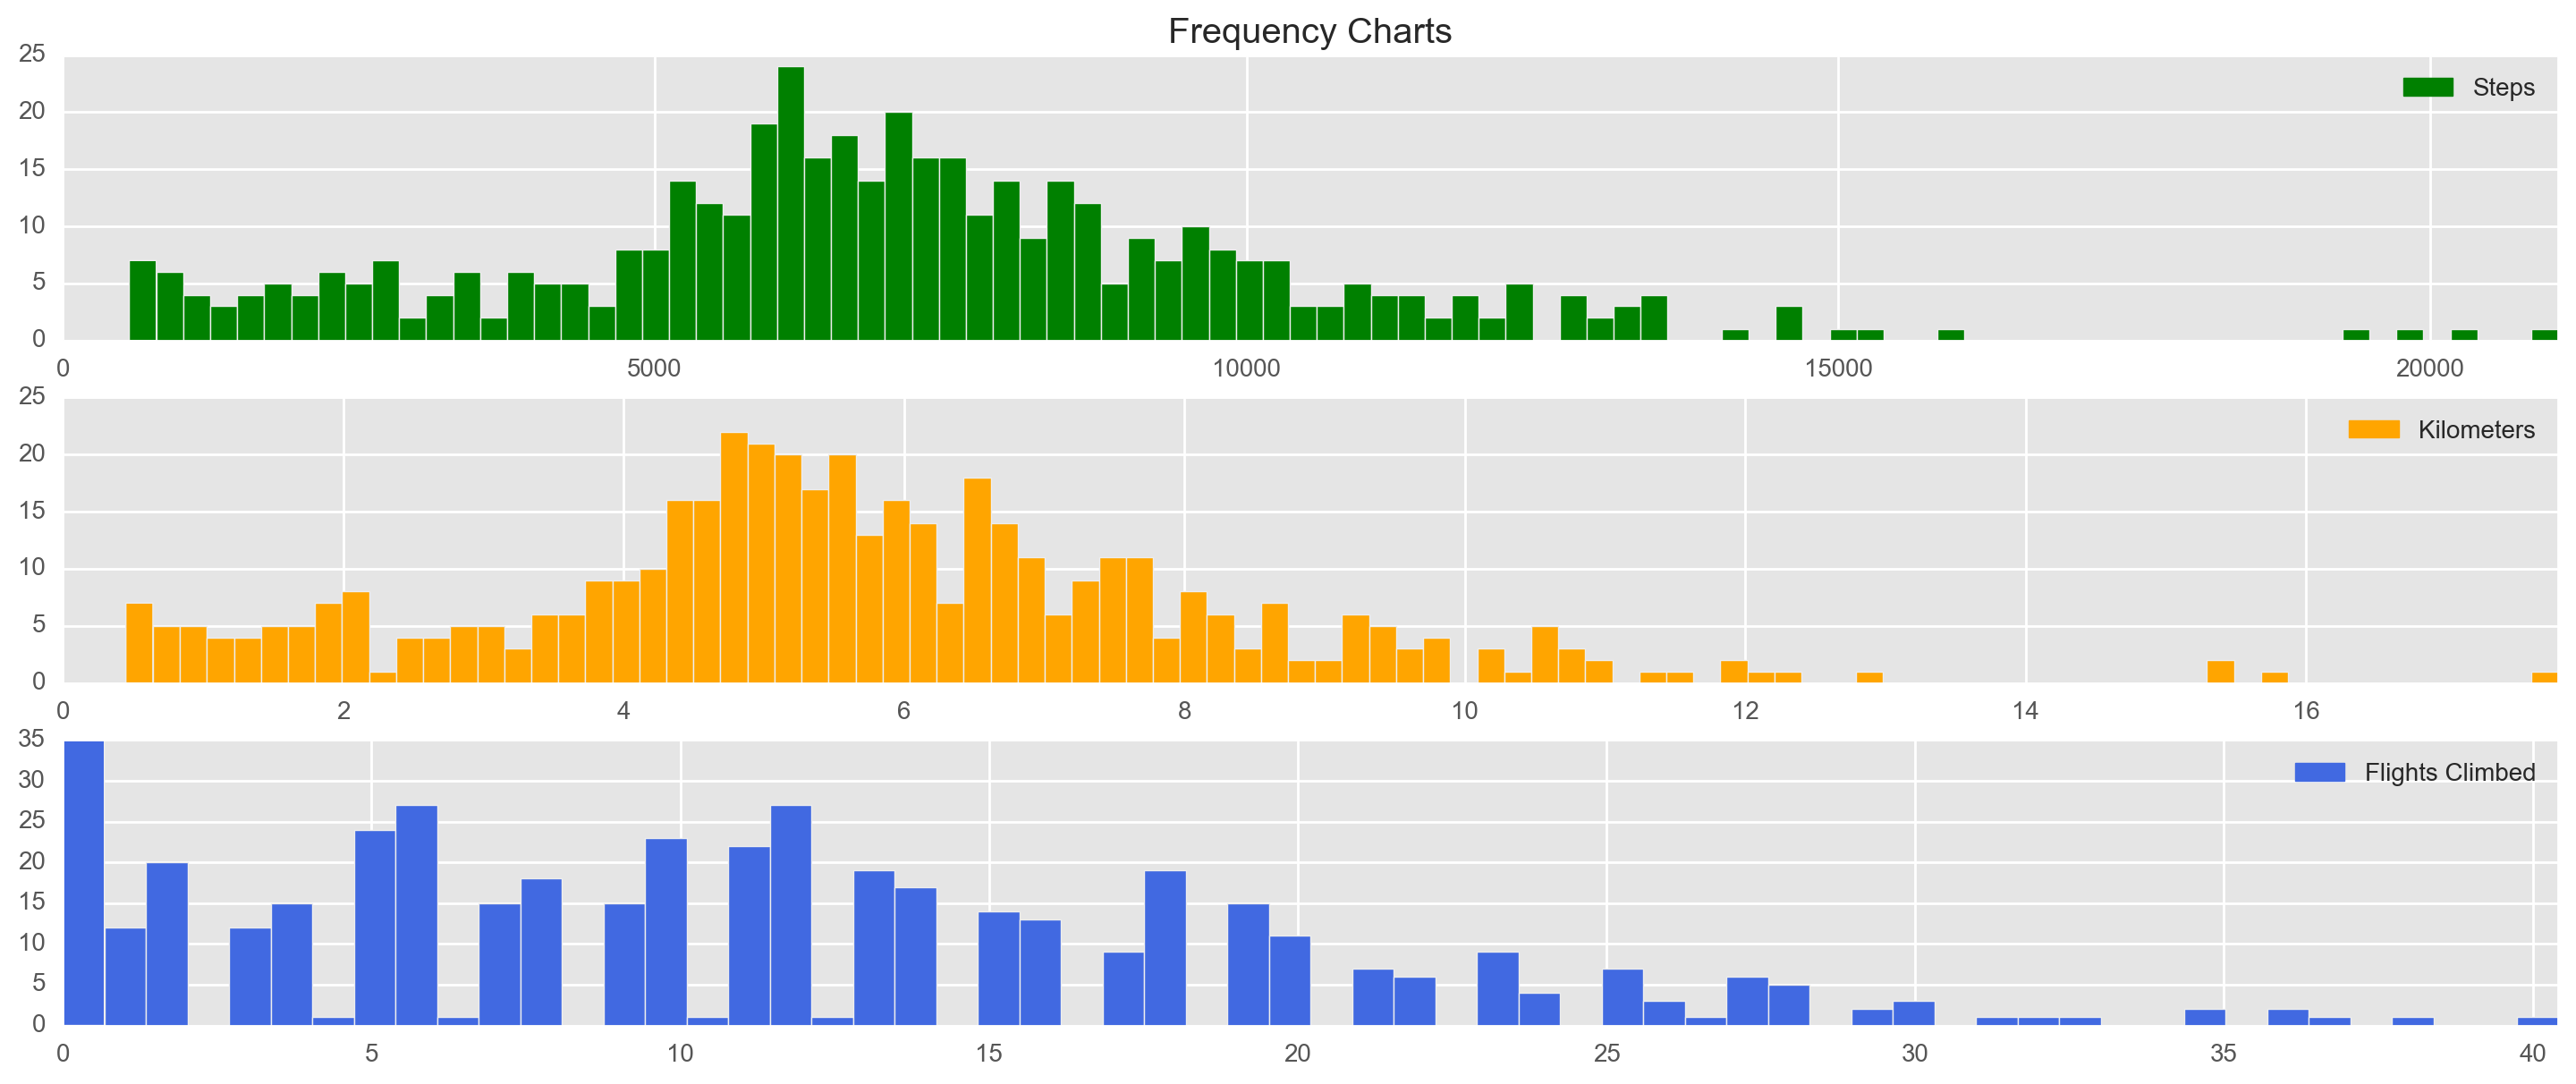

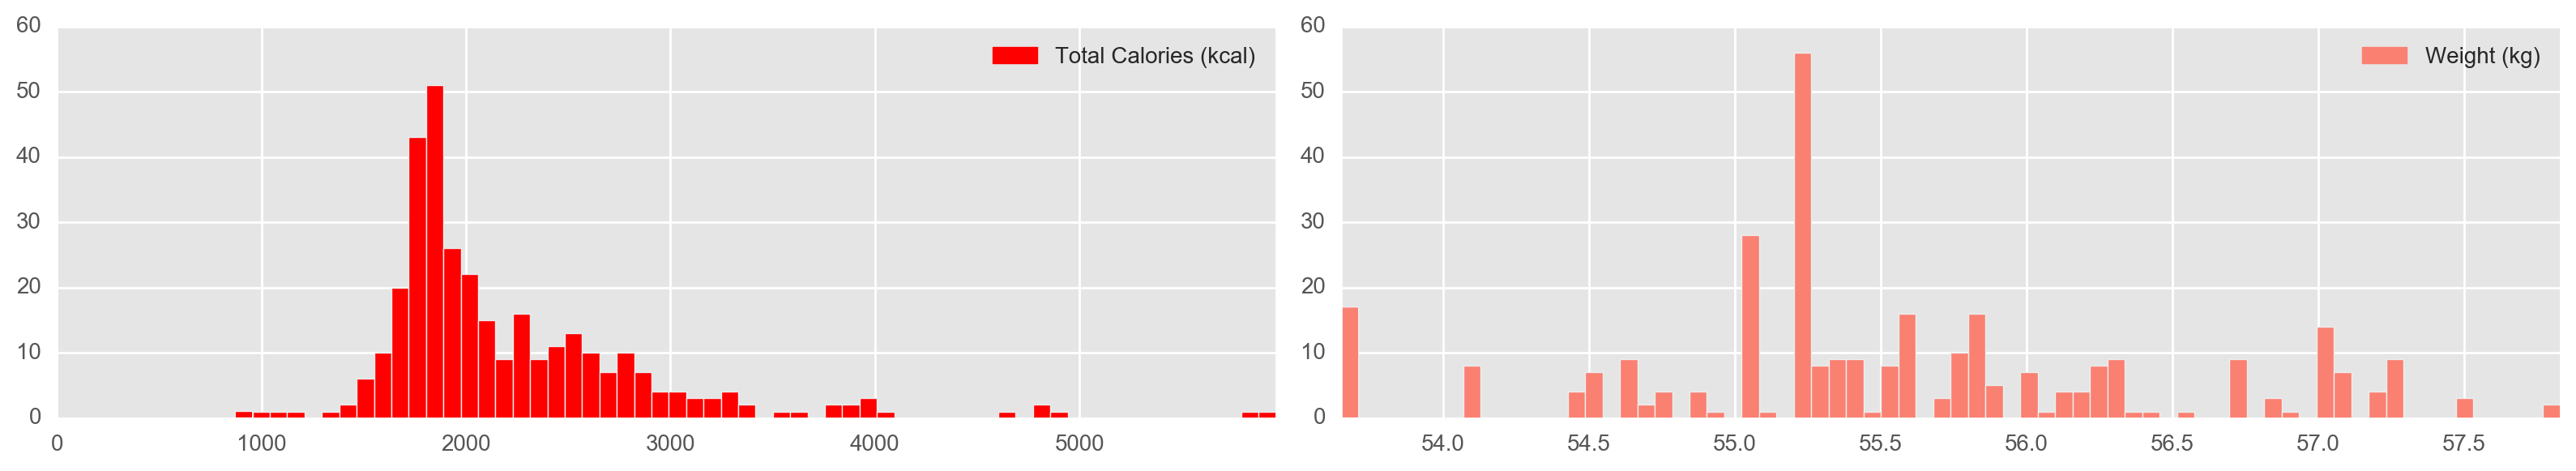

In [8]:
plt.figure(1,figsize=(18,7))

plt.subplot(311)
plt.title('Frequency Charts')
plt.legend(handles=[mpatches.Patch(color='green', label='Steps')])
plt.hist(data_for_steps.ix[:,'Steps (count)'], bins=90, color='g')
plt.xlim(0,data_for_steps.ix[:,'Steps (count)'].max())

plt.subplot(312)
plt.legend(handles=[mpatches.Patch(color='orange', label='Kilometers')])
plt.hist(data_for_steps.ix[:,'Distance (km)'], bins=90, color='orange')
plt.xlim(0,data_for_steps.ix[:,'Distance (km)'].max())

plt.subplot(313)
plt.legend(handles=[mpatches.Patch(color='royalblue', label='Flights Climbed')])
plt.hist(data_for_steps.ix[:,'Flights Climbed (count)'], bins=60, color='royalblue')
plt.xlim(0,data_for_steps.ix[:,'Flights Climbed (count)'].max())

plt.figure(2,figsize=(16,3))
plt.subplot(121)
plt.legend(handles=[mpatches.Patch(color='red', label='Total Calories (kcal)')])
plt.hist(data_for_cal.ix[:,'Total Calories (kcal)'], bins=60, color='red')
plt.xlim(0,data_for_cal.ix[:,'Total Calories (kcal)'].max())

plt.subplot(122)
plt.legend(handles=[mpatches.Patch(color='salmon', label='Weight (kg)')])
plt.hist(data_for_weight.ix[:,'Weight (kg)'], bins=70, color='salmon')
plt.xlim(data_for_weight.ix[:,'Weight (kg)'].min(),data_for_weight.ix[:,'Weight (kg)'].max())

plt.tight_layout()
plt.show()

count         mean          std    min     25%     50%     75%  \
Steps (count)  449.0  7054.914777  3238.225356  562.0  5299.0  6889.0  8701.0   

                   max  
Steps (count)  21082.0

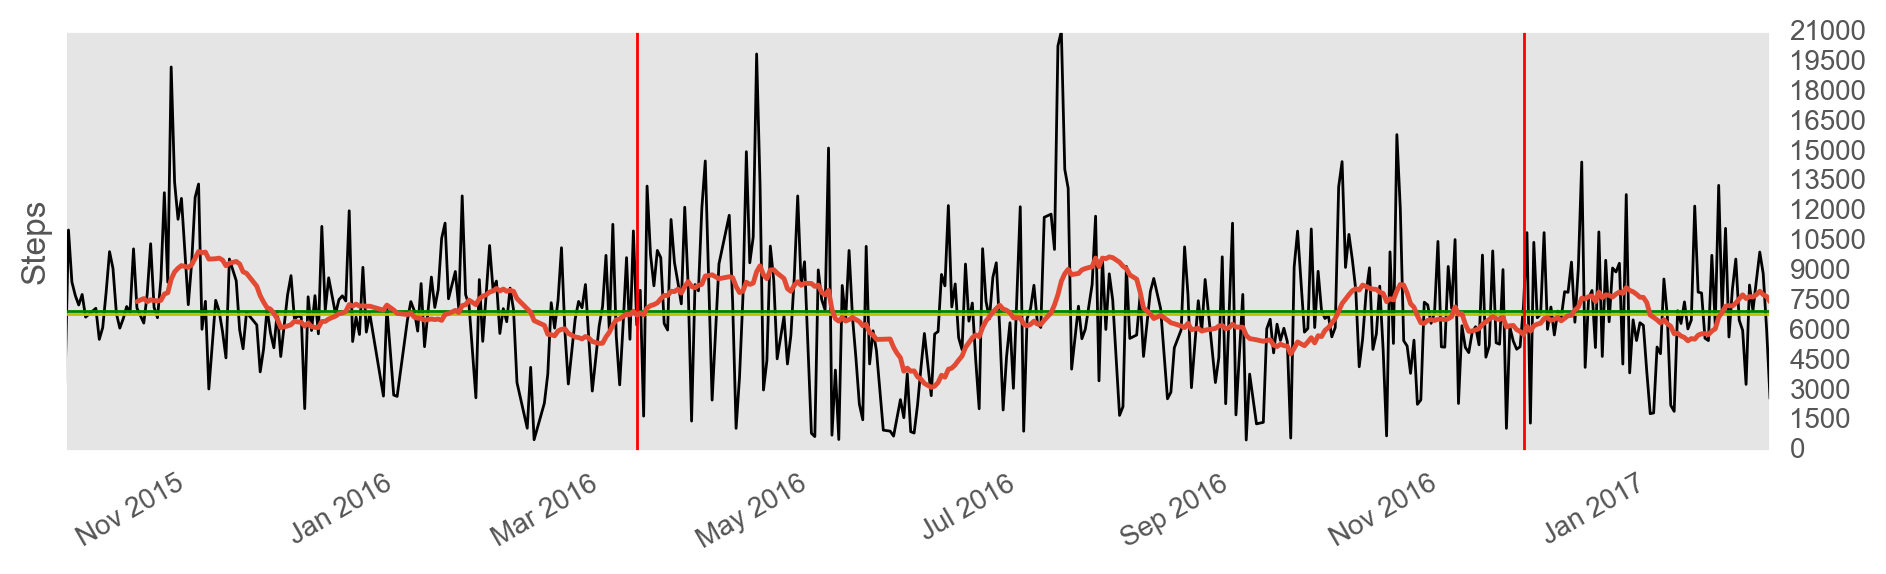

In [9]:
medianval = np.round(data_for_steps.ix[:,'Steps (count)'].median(),1)
avgval = np.round(data_for_steps.ix[:,'Steps (count)'].mean(),1)
maxval = np.round(data_for_steps.ix[:,'Steps (count)'].max(),1)

minor_ticks = np.arange(0, maxval+1, 1500, dtype=int)
minor_labels = minor_ticks

ax1 = data_for_steps.ix[:,'Steps (count)'].plot(color='000000',figsize=(11, 3),linewidth=1.0)

ax1.set_ylim(0,maxval)
ax1.set_ylabel('Steps')
ax1.set_yticks(minor_ticks)
ax1.set_yticklabels(minor_labels)
ax1.yaxis.tick_right()

ax1.set_xticks(data_for_steps.index, minor=True)
#Add the horizontal and vertical lines
ax1.axhline(y=medianval, linewidth=1, color='y')
ax1.axhline(y=avgval, linewidth=1, color='g')
ax1.axvline(x='2016-03-11', linewidth=1, color='r')
ax1.axvline(x='2016-11-25', linewidth=1, color='r')
ax1.grid(b=False)

#Rolling 20 Day MA
ma = data_for_steps.ix[:,'Steps (count)'].rolling(20).mean()
ax1.plot(ma)

pd.DataFrame(data_for_steps["Steps (count)"].describe()).transpose()

count       mean       std  min  25%   50%   75%  \
Flights Climbed (count)  449.0  11.604126  8.294138  0.0  5.0  11.0  17.0   

                             max  
Flights Climbed (count)  40.4134

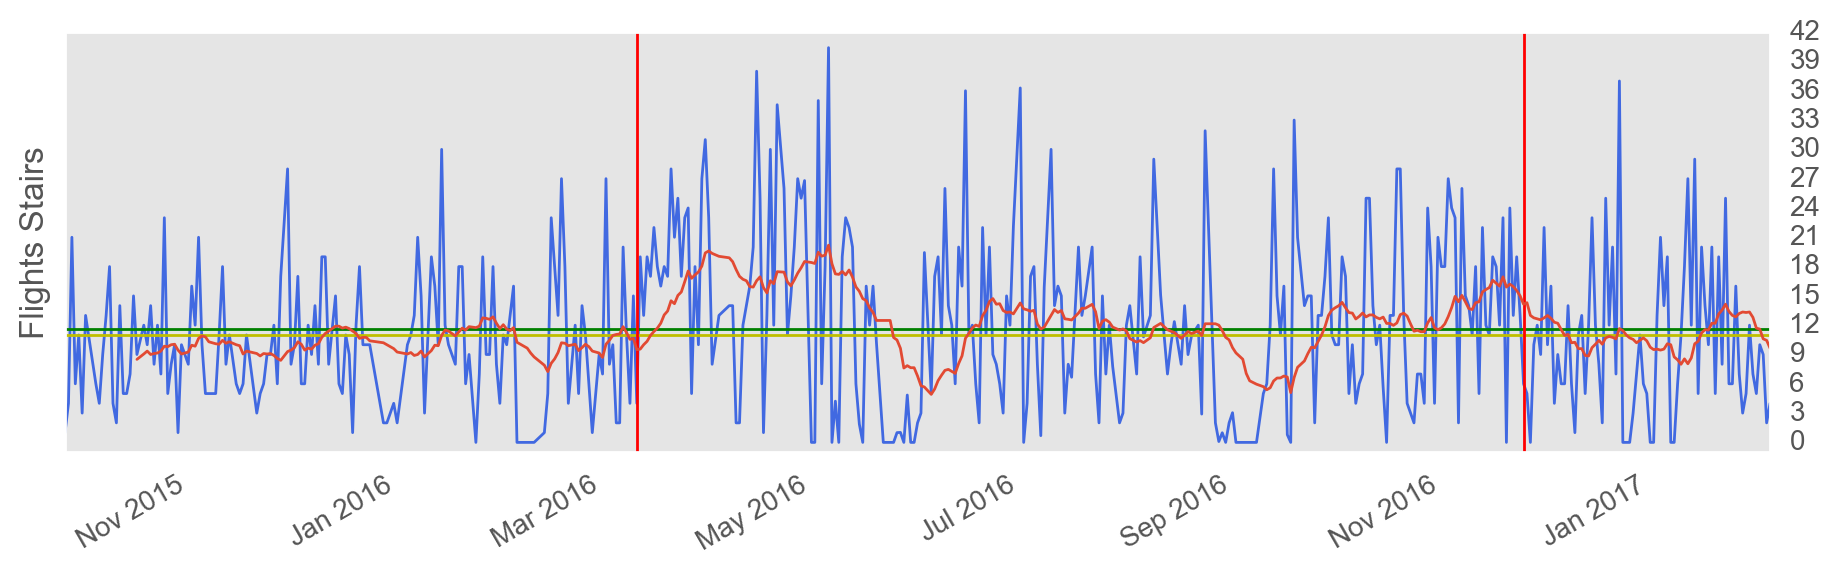

In [10]:
medianval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].median(),1)
avgval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].mean(),1)
maxval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].max(),1)

minor_ticks_stairs = np.arange(0, maxval2+2, 3, dtype=int)
minor_labels_stairs = minor_ticks_stairs

ax2 = data_for_steps.ix[:,'Flights Climbed (count)'].plot(color='royalblue',figsize=(11, 3),linewidth=1.0)

ax2.set_ylim(-1,maxval2)
ax2.set_ylabel('Flights Stairs')
ax2.set_yticks(minor_ticks_stairs)
ax2.set_yticklabels(minor_labels_stairs)
ax2.yaxis.tick_right()

#Add the horizontal and vertical lines
ax2.axhline(y=medianval2, linewidth=1, color='y')
ax2.axhline(y=avgval2, linewidth=1, color='g')
ax2.axvline(x='2016-03-11', linewidth=1, color='r')
ax2.axvline(x='2016-11-25', linewidth=1, color='r')
ax2.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Flights Climbed (count)'].rolling(20).mean()
ax2.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Flights Climbed (count)'].describe()).transpose()

count      mean       std   min   25%       50%  75%   max
Distance (km)  449.0  5.661034  2.611699  0.45  4.31  5.484903  7.0  17.8

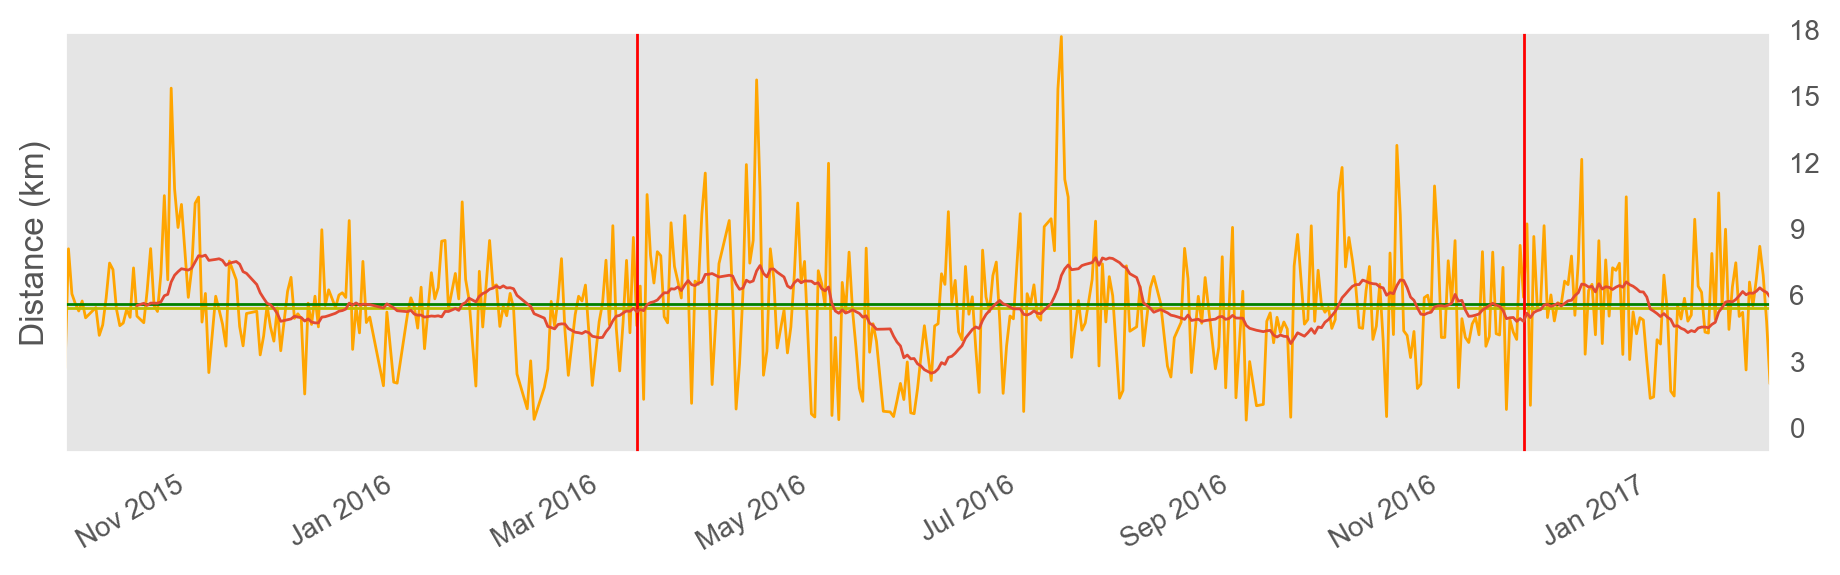

In [11]:
medianval3 = np.round(data_for_steps.ix[:,'Distance (km)'].median(),1)
avgval3 = np.round(data_for_steps.ix[:,'Distance (km)'].mean(),1)
maxval3 = np.round(data_for_steps.ix[:,'Distance (km)'].max(),1)

minor_ticks_km = np.arange(0, maxval3+1, 3, dtype=int)
minor_labels_km = minor_ticks_km

ax6 = data_for_steps.ix[:,'Distance (km)'].plot(color='orange',figsize=(11, 3),linewidth=1.0)

ax6.set_ylim(-1,data_for_steps.ix[:,'Distance (km)'].max())
ax6.set_ylabel('Distance (km)')
ax6.set_yticks(minor_ticks_km)
ax6.set_yticklabels(minor_labels_km)
ax6.yaxis.tick_right()

#Add the horizontal and vertical lines
ax6.axhline(y=medianval3, linewidth=1, color='y')
ax6.axhline(y=avgval3, linewidth=1, color='g')
ax6.axvline(x='2016-03-11', linewidth=1, color='r')
ax6.axvline(x='2016-11-25', linewidth=1, color='r')
ax6.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Distance (km)'].rolling(20).mean()
ax6.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Distance (km)'].describe()).transpose()

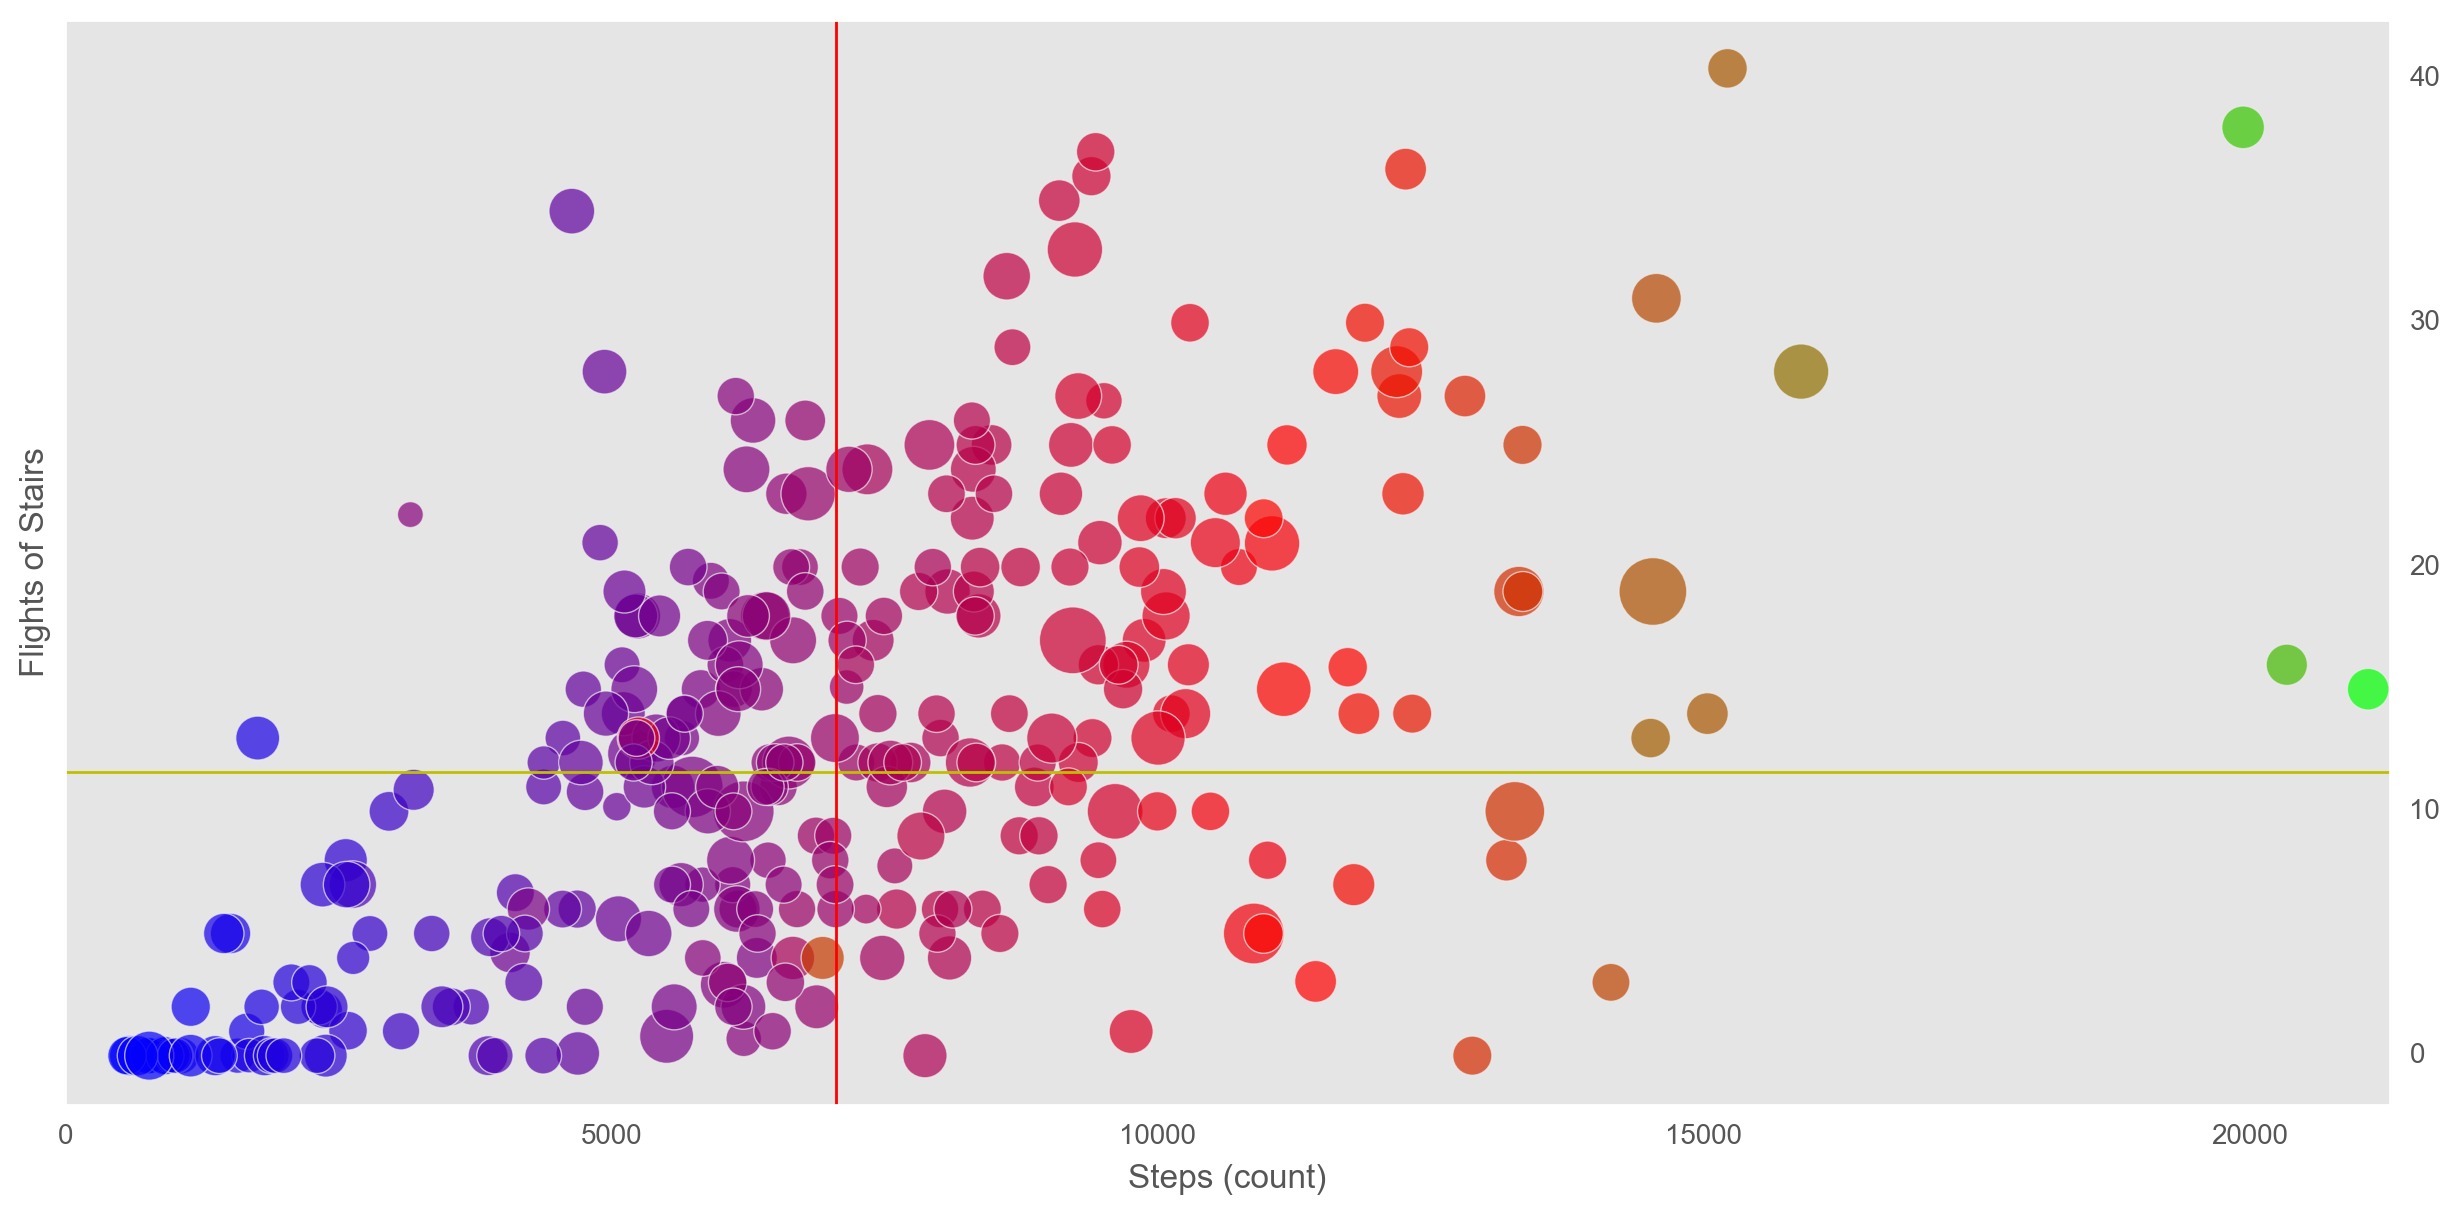

In [12]:
#Scatter chart Steps vs Stairs
plt.figure(1,figsize=(15,7))

x = data_for_steps.ix[:,'Steps (count)']
y = data_for_steps.ix[:,'Flights Climbed (count)']
plt.xlabel('Steps (count)')
plt.ylabel('Flights of Stairs')
plt.xlim(-5,data_for_steps.ix[:,'Steps (count)'].max()+200)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.ylim(-2,data_for_steps.ix[:,'Flights Climbed (count)'].max()+2)
plt.grid(b=False)
plt.axhline(y=avgval2, linewidth=1, color='y')
plt.axvline(x=avgval, linewidth=1, color='r')

plt.scatter(x, y, alpha=0.7,c=data_for_steps.ix[:,'Distance (km)'], s=data_for_steps.ix[:,'Total Calories (kcal)']/10, cmap=cm.brg)
plt.show()

##### Most active day ever by number of climbed stairs

In [13]:
data_for_steps.ix[data_for_steps['Flights Climbed (count)']==data_for_steps['Flights Climbed (count)'].max()]

Active Calories (kcal)  Blood Glucose (mg/dL)  \
2016-05-06                   513.0                    0.0   

            Blood Pressure (Diastolic) (mmHg)  \
2016-05-06                                0.0   

            Blood Pressure (Systolic) (mmHg)  Body Fat Percentage (%)  \
2016-05-06                               0.0                     12.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-05-06                     18.0          12.07                  40.4134   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-05-06                   115.0             48.91029   

            Oxygen Saturation (%)  Resting Calories (kcal)  Steps (count)  \
2016-05-06                    0.0                   1526.0        15216.0   

            Weight (kg)  Total Calories (kcal) Weekday  
2016-05-06        55.77                 2039.0   4 Fri

##### Most active day ever by number of steps

In [14]:
data_for_steps.ix[data_for_steps['Steps (count)']==data_for_steps['Steps (count)'].max()]

Active Calories (kcal)  Blood Glucose (mg/dL)  \
2016-07-13                   724.0                    0.0   

            Blood Pressure (Diastolic) (mmHg)  \
2016-07-13                                0.0   

            Blood Pressure (Systolic) (mmHg)  Body Fat Percentage (%)  \
2016-07-13                               0.0                     10.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-07-13                     17.8           17.8                     15.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-07-13                   128.0             49.37088   

            Oxygen Saturation (%)  Resting Calories (kcal)  Steps (count)  \
2016-07-13                    0.0                   1525.0        21082.0   

            Weight (kg)  Total Calories (kcal) Weekday  
2016-07-13        55.04                 2249.0  2 Weds

##### Most active day ever by distance done

In [15]:
data_for_steps.ix[data_for_steps['Distance (km)']==data_for_steps['Distance (km)'].max()]

Active Calories (kcal)  Blood Glucose (mg/dL)  \
2016-07-13                   724.0                    0.0   

            Blood Pressure (Diastolic) (mmHg)  \
2016-07-13                                0.0   

            Blood Pressure (Systolic) (mmHg)  Body Fat Percentage (%)  \
2016-07-13                               0.0                     10.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-07-13                     17.8           17.8                     15.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-07-13                   128.0             49.37088   

            Oxygen Saturation (%)  Resting Calories (kcal)  Steps (count)  \
2016-07-13                    0.0                   1525.0        21082.0   

            Weight (kg)  Total Calories (kcal) Weekday  
2016-07-13        55.04                 2249.0  2 Weds

#### Weight, Lean Body Mass and Body Fat % Analysis

Weight (kg)  Lean Body Mass (kg)  Body Fat Percentage (%)  \
2017-02-05        55.23             49.32039                     10.7   

            Body Mass Index (count)  
2017-02-05                17.799999

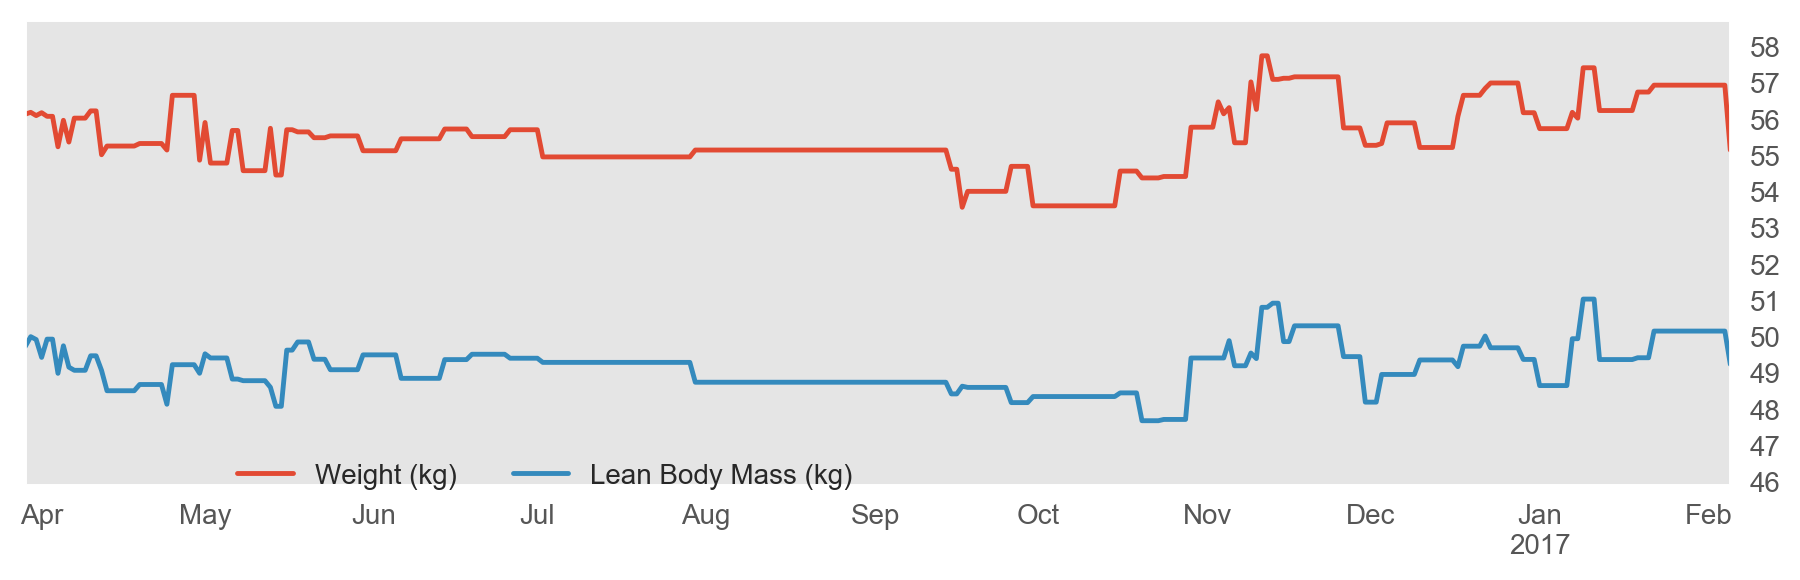

In [37]:
minor_ticks_weight = np.arange(data_for_weight['Lean Body Mass (kg)'].min()-1, data_for_weight['Weight (kg)'].max()+1, 1, dtype=int)
minor_labels_weight = minor_ticks_weight

ax9 = data_for_weight['Weight (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9 = data_for_weight['Lean Body Mass (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9.legend(loc=1, bbox_to_anchor=(0.5, 0.1), ncol=2)
ax9.grid(b=False)
ax9.yaxis.tick_right()
ax9.set_ylim(data_for_weight['Lean Body Mass (kg)'].min()-1,data_for_weight['Weight (kg)'].max()+1)
ax9.set_yticks(minor_ticks_weight)
ax9.set_yticklabels(minor_labels_weight)

data_for_weight.tail(1)

In [17]:
#Averages, Medians, High, Low per Weekday
data_for_weekday.groupby('Weekday').agg(['mean','median','min','max','std']).transpose()

Weekday                                          0 Mon         1 Tue  \
Active Calories (kcal)            mean      725.264267    608.914271   
                                  median    510.465388    440.000000   
                                  min        40.000000      0.000000   
                                  max      4100.000000   3946.000000   
                                  std       723.095414    624.807488   
Blood Glucose (mg/dL)             mean        1.108652      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        86.474822      0.000000   
                                  std         9.791346      0.000000   
Blood Pressure (Diastolic) (mmHg) mean        0.794872      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        62.000000      0.000000   
                                  std         7.020118      0.000000   
Blood Pressure (Systolic) (mmHg)  mean        1.230769      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max        96.000000      0.000000   
                                  std        10.869860      0.000000   
Distance (km)                     mean        5.707987      5.793500   
                                  median      5.724557      5.598574   
                                  min         0.450000      0.740000   
                                  max        12.248473     15.466486   
                                  std         2.456754      2.534529   
Flights Climbed (count)           mean       11.658405     10.921398   
                                  median     12.000000     11.000000   
                                  min         0.000000      0.000000   
                                  max        33.000000     35.000000   
                                  std         8.620627      7.930289   
Heart Rate (count/min)            mean       76.884615     73.448718   
                                  median    104.500000    104.000000   
                                  min         0.000000      0.000000   
                                  max       175.000000    167.000000   
                                  std        64.951327     63.564191   
Oxygen Saturation (%)             mean        0.000000      0.000000   
                                  median      0.000000      0.000000   
                                  min         0.000000      0.000000   
                                  max         0.000000      0.000000   
                                  std         0.000000      0.000000   
Resting Calories (kcal)           mean     1652.697876   1649.980219   
                                  median   1533.857071   1533.000000   
                                  min      1507.212797   1507.387133   
                                  max      1860.000000   1860.000000   
                                  std       159.154665    159.289095   
Steps (count)                     mean     7154.290416   7314.500899   
                                  median   7163.500000   7041.000000   
                                  min       562.000000    910.000000   
                                  max     14533.000000  20337.000000   
                                  std      3009.761635   3196.357894   
Total Calories (kcal)             mean     2377.962144   2258.894490   
                                  median   2042.973272   2040.000000   
                                  min      1566.000000   1636.000000   
                                  max      5960.000000   5806.000000   
                                  std   

#### Heart Rate Data Analysis

[]

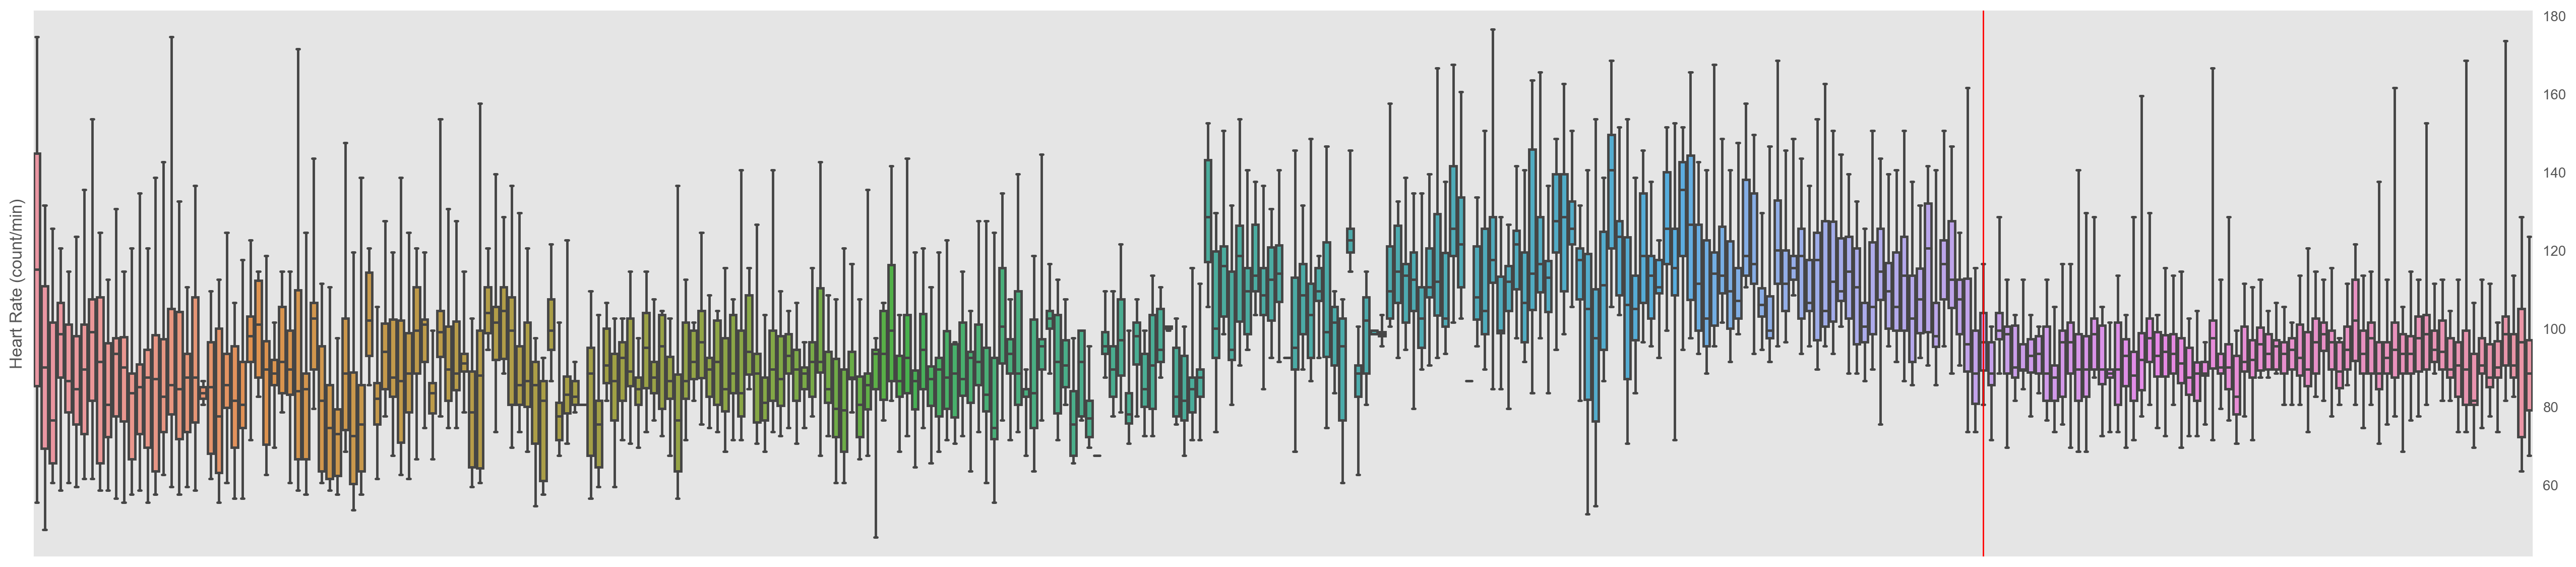

In [47]:
#Box Plot for Heart Rate Data 
plt.figure(figsize=(32,7))
ax5 = sns.boxplot(x="Date", y="Heart Rate (count/min)", data=hr_intraday, whis=[0,100])
ax5.set_ylim(hr_intraday['Heart Rate (count/min)'].min()-5,hr_intraday['Heart Rate (count/min)'].max()+5)
ax5.set_xticklabels(hr_intraday['Date'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
ax5.axes.get_xaxis().set_visible(False)
ax5.axvline(x='246', linewidth=1, color='r')
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)
ax5.plot()

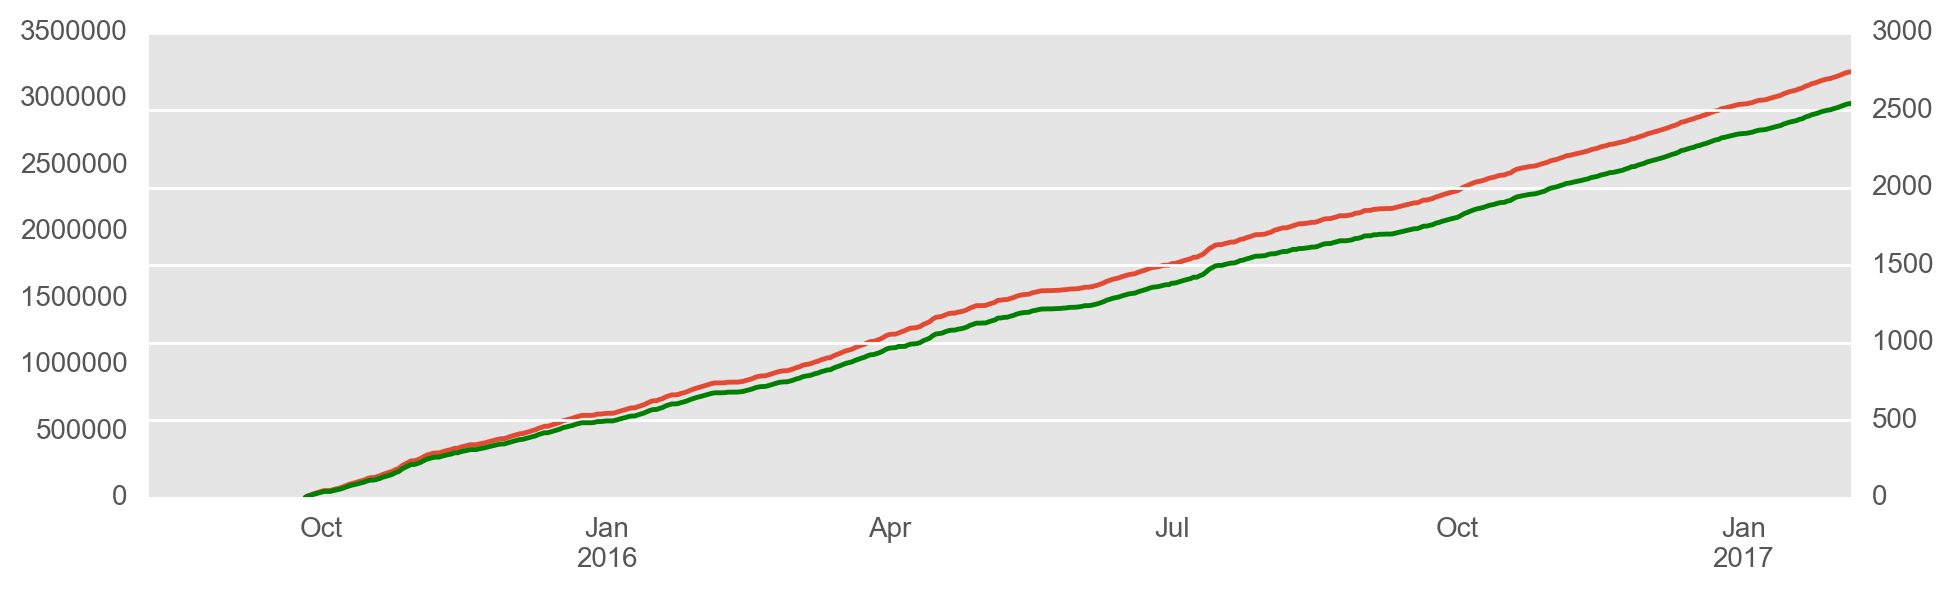

In [19]:
#Cumulative Charts
#Cumulative steps done
#Cumulative km walked
#Cumulative dataset

cumulative = data[['Steps (count)','Distance (km)','Flights Climbed (count)']].copy()
cumulative = cumulative.cumsum(axis=0, skipna=True)
cumulative = cumulative.fillna(method='ffill')
cumulative['Steps (count)'].plot(figsize=(11,3))
cumulative['Distance (km)'].plot(secondary_y=True, style='g')

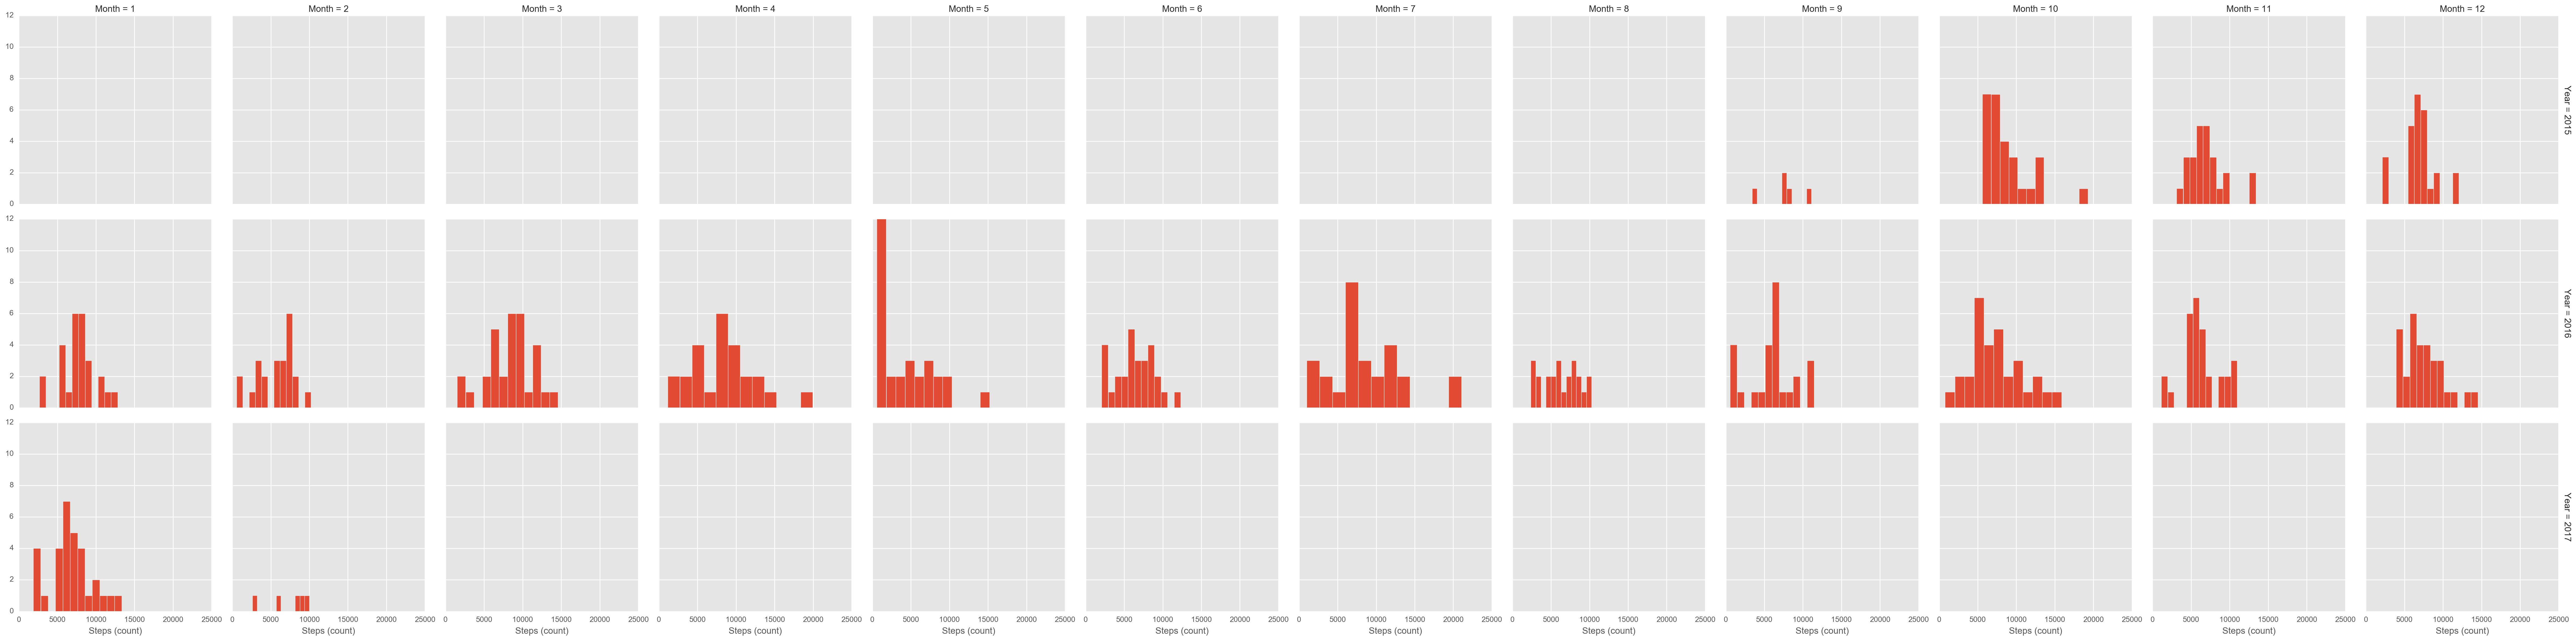

In [20]:
#matrix charts histograms steps done per month
matrixdata = data_for_steps[['Steps (count)','Distance (km)','Flights Climbed (count)','Weekday']].copy()
matrixdata['Month']=pd.to_datetime(matrixdata.index).month
matrixdata['Year']=pd.to_datetime(matrixdata.index).year
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=12)

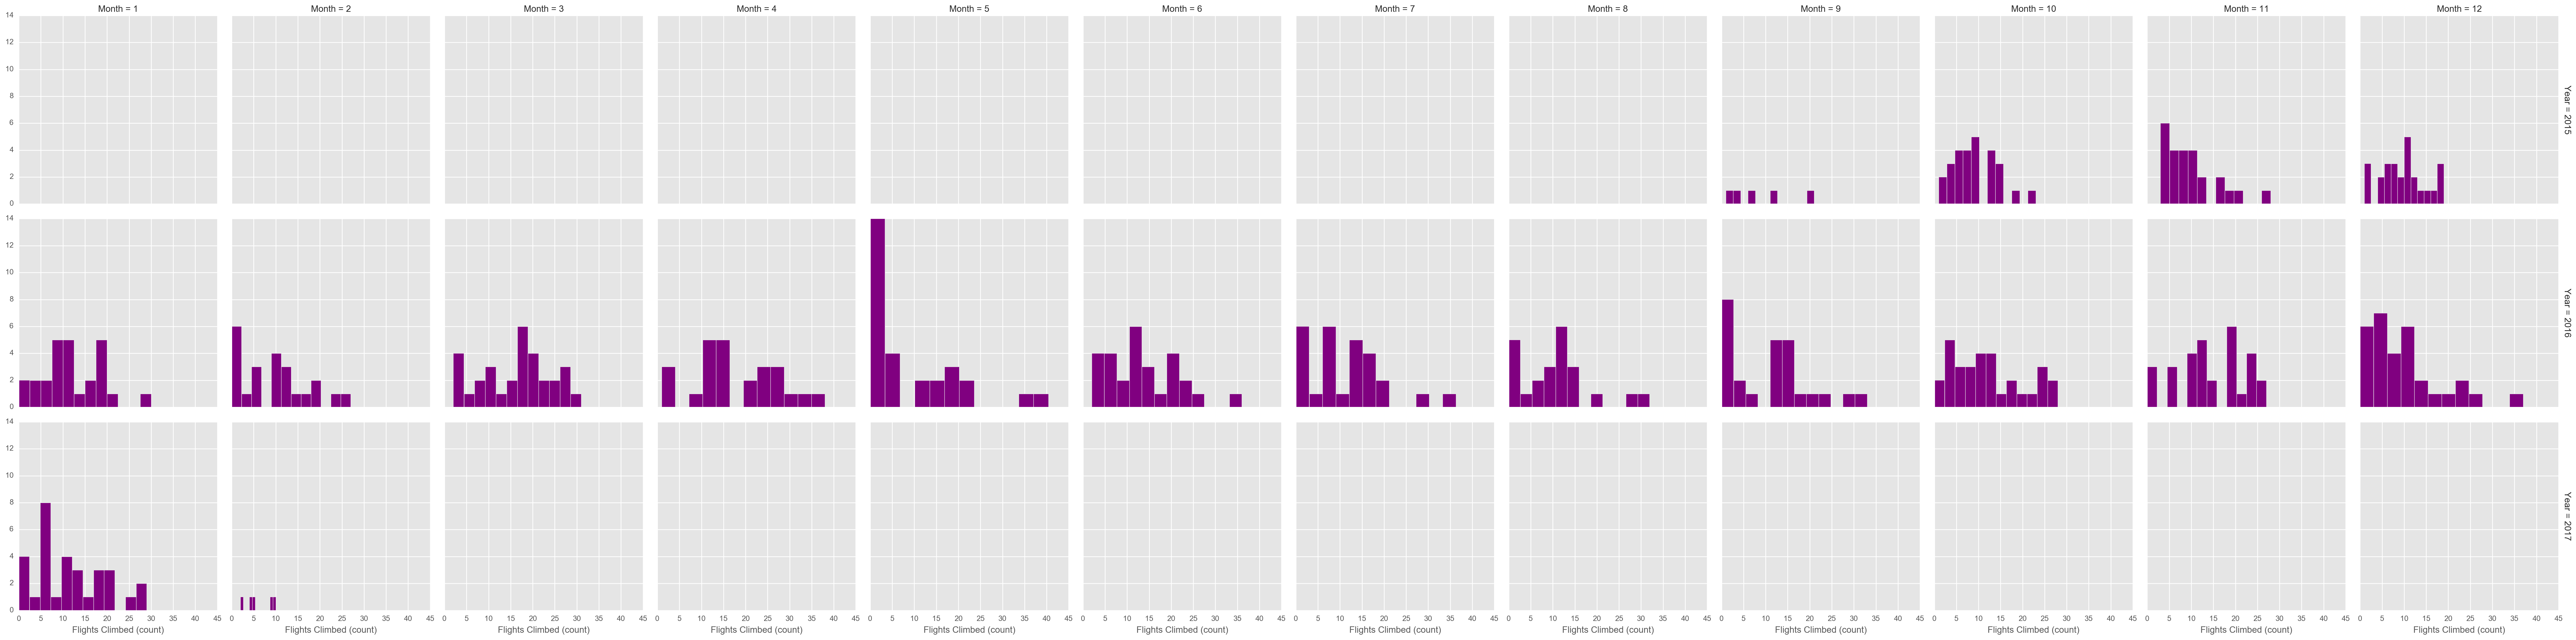

In [21]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=12, color="purple")

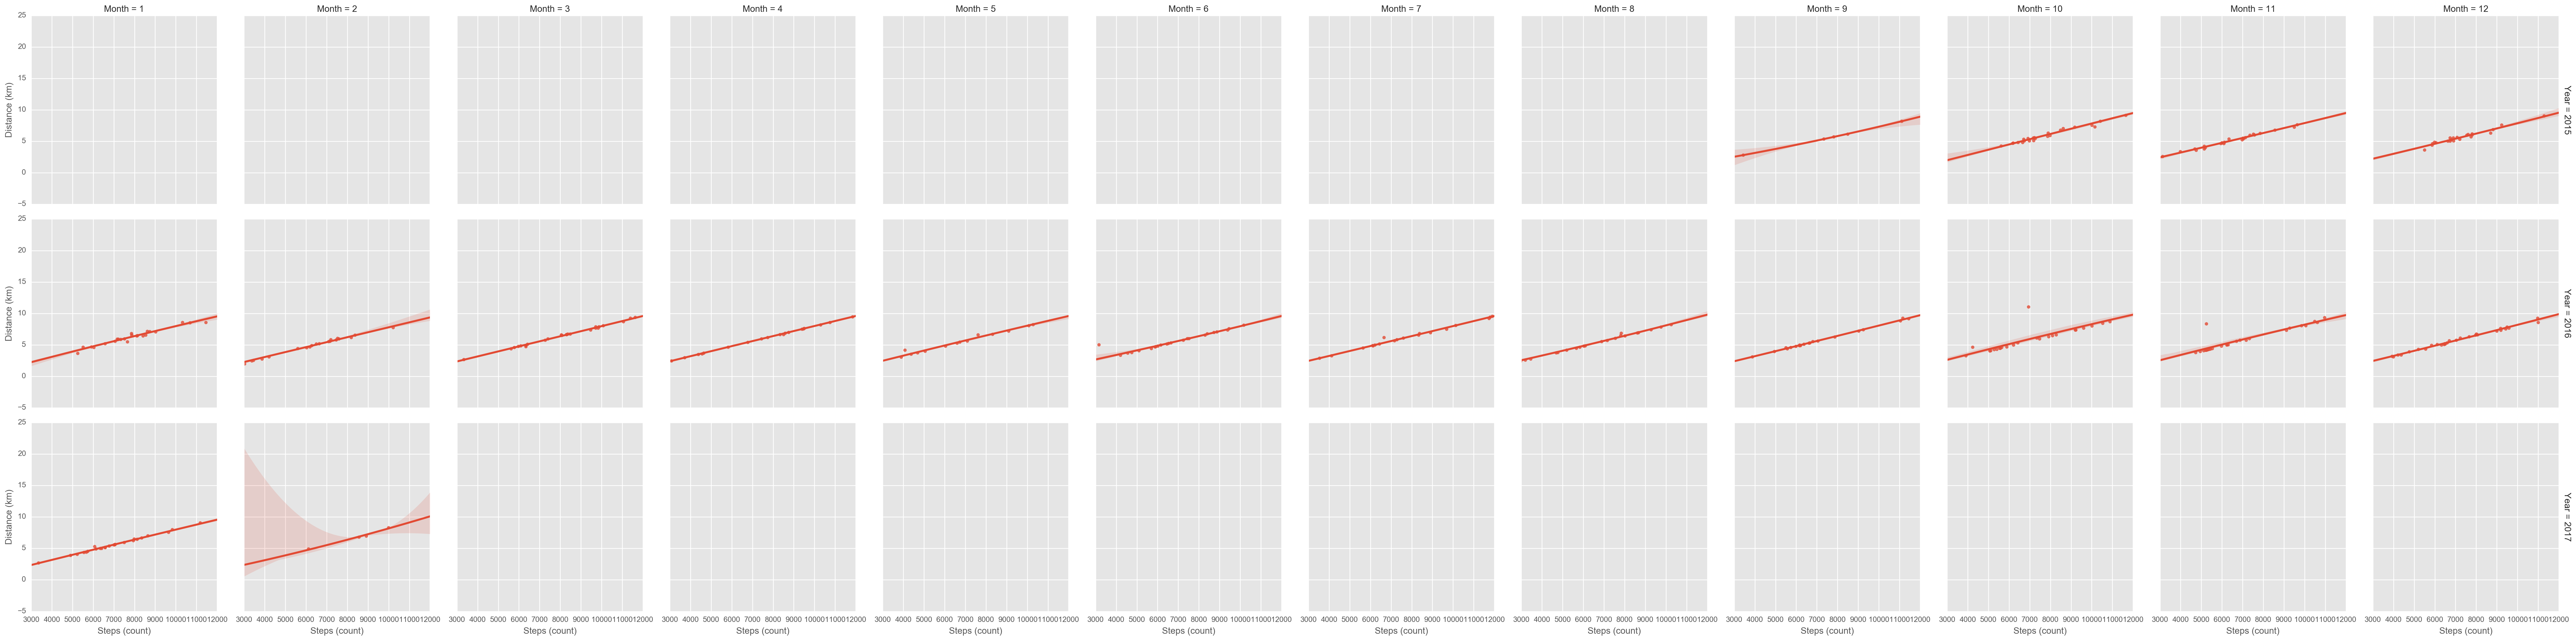

In [22]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

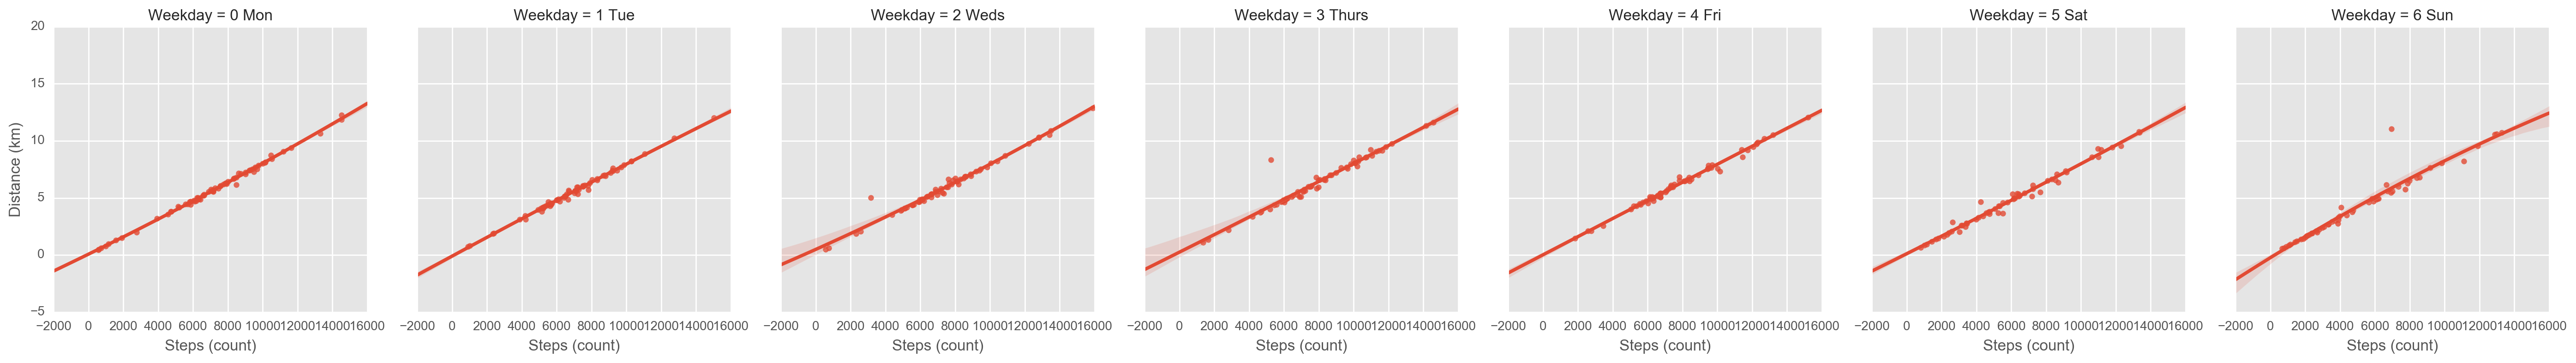

In [23]:
matrixdata = matrixdata.sort("Weekday")
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

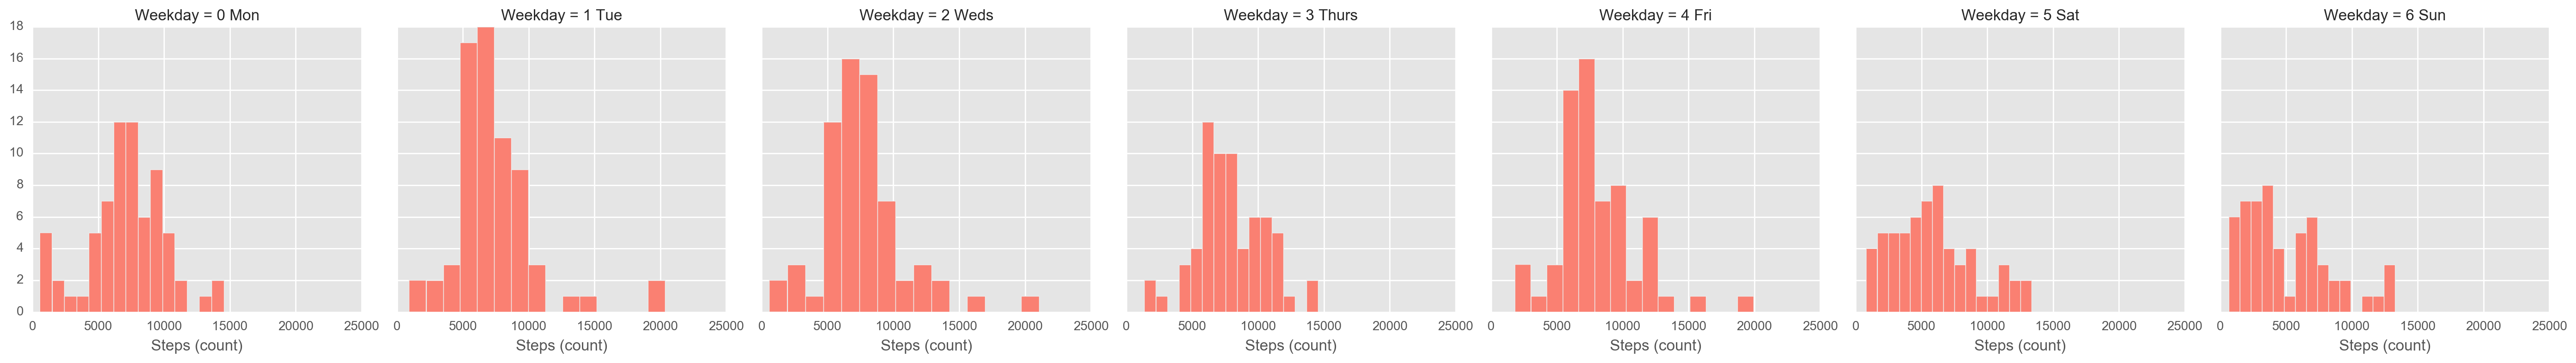

In [24]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=15, color="salmon")

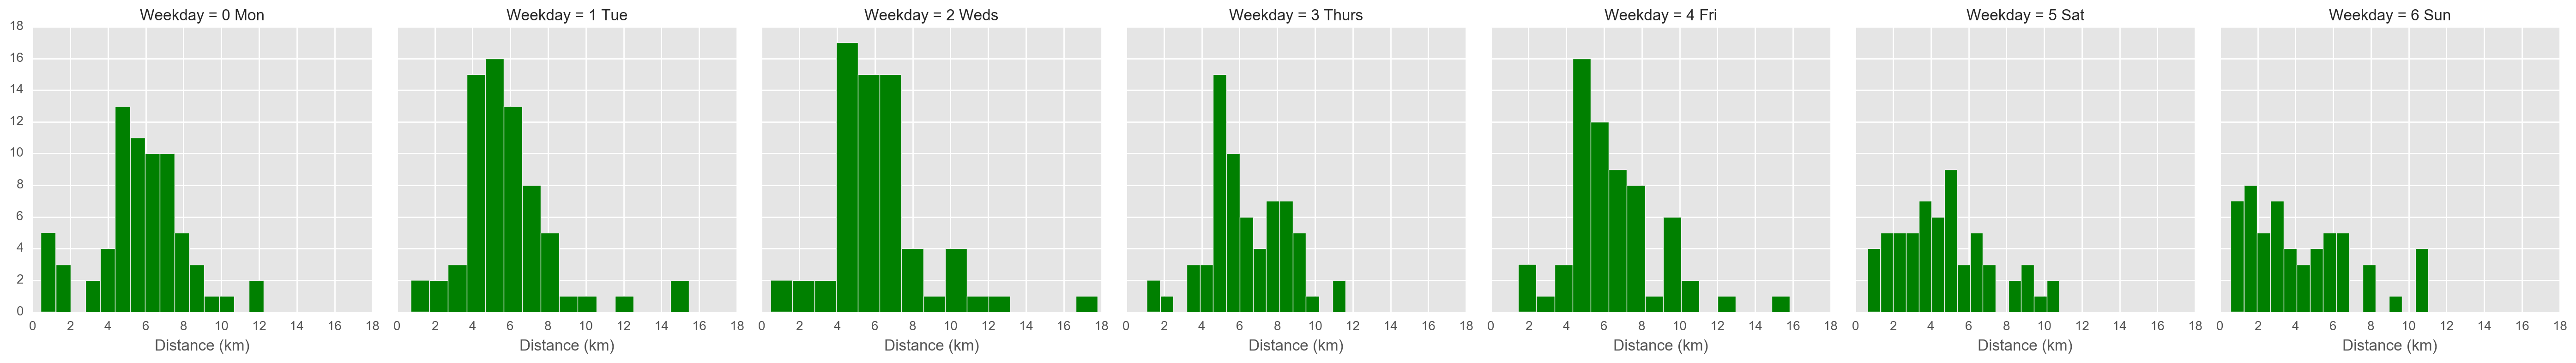

In [25]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Distance (km)", bins=15, color="g")

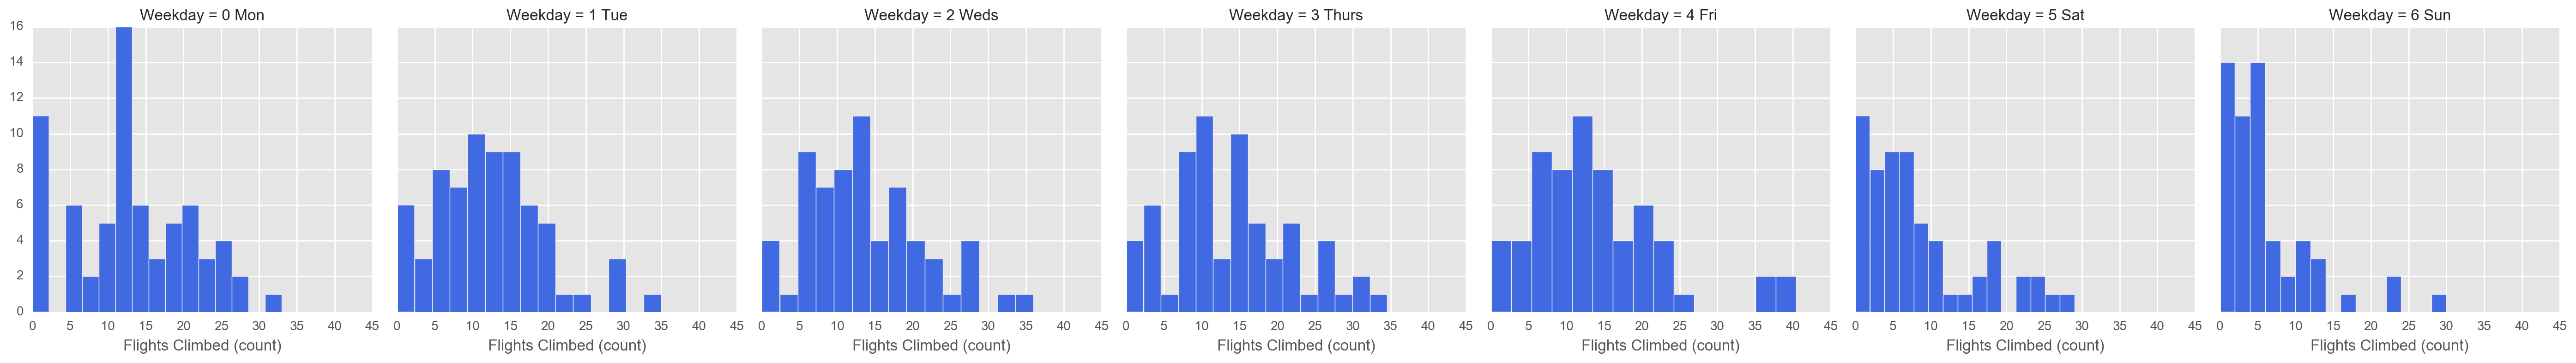

In [26]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=15, color="royalblue")

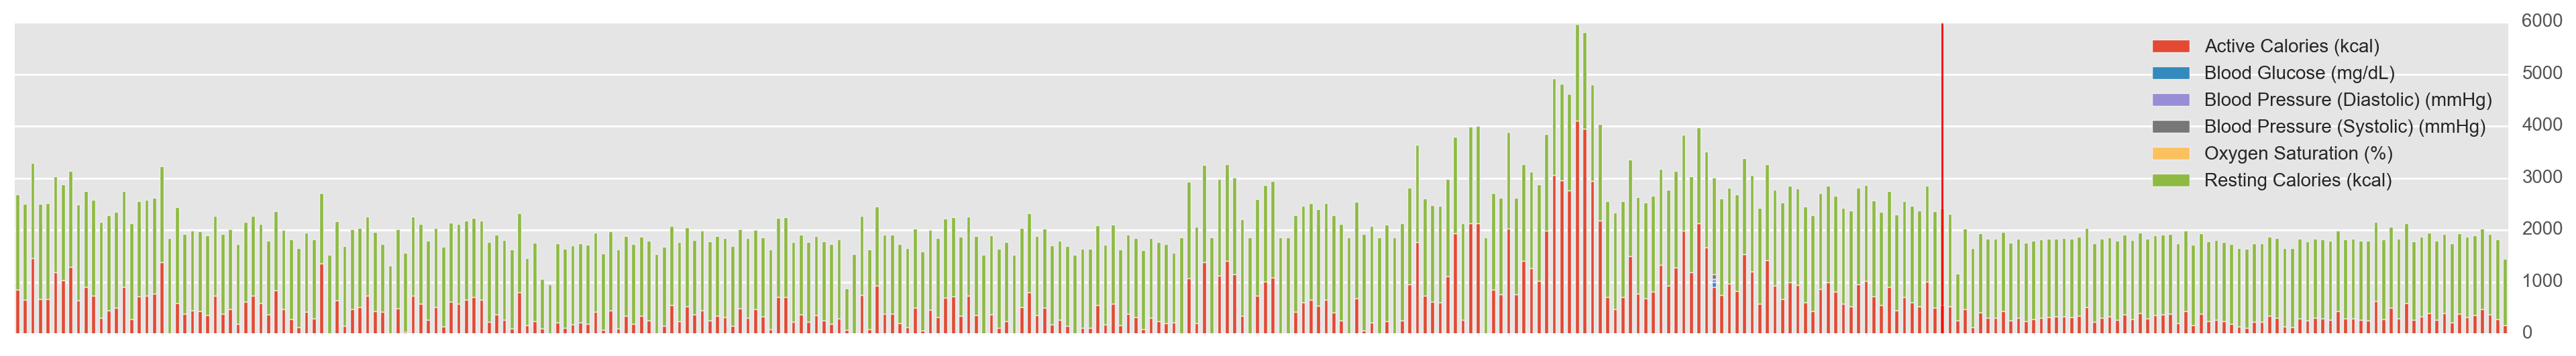

In [53]:
ax7 = data_for_cal2.plot.bar(stacked=True, figsize=(24, 3))
ax7.axes.get_xaxis().set_visible(False)
ax7.axvline(x='253', linewidth=1, color='r')
ax7.yaxis.tick_right()

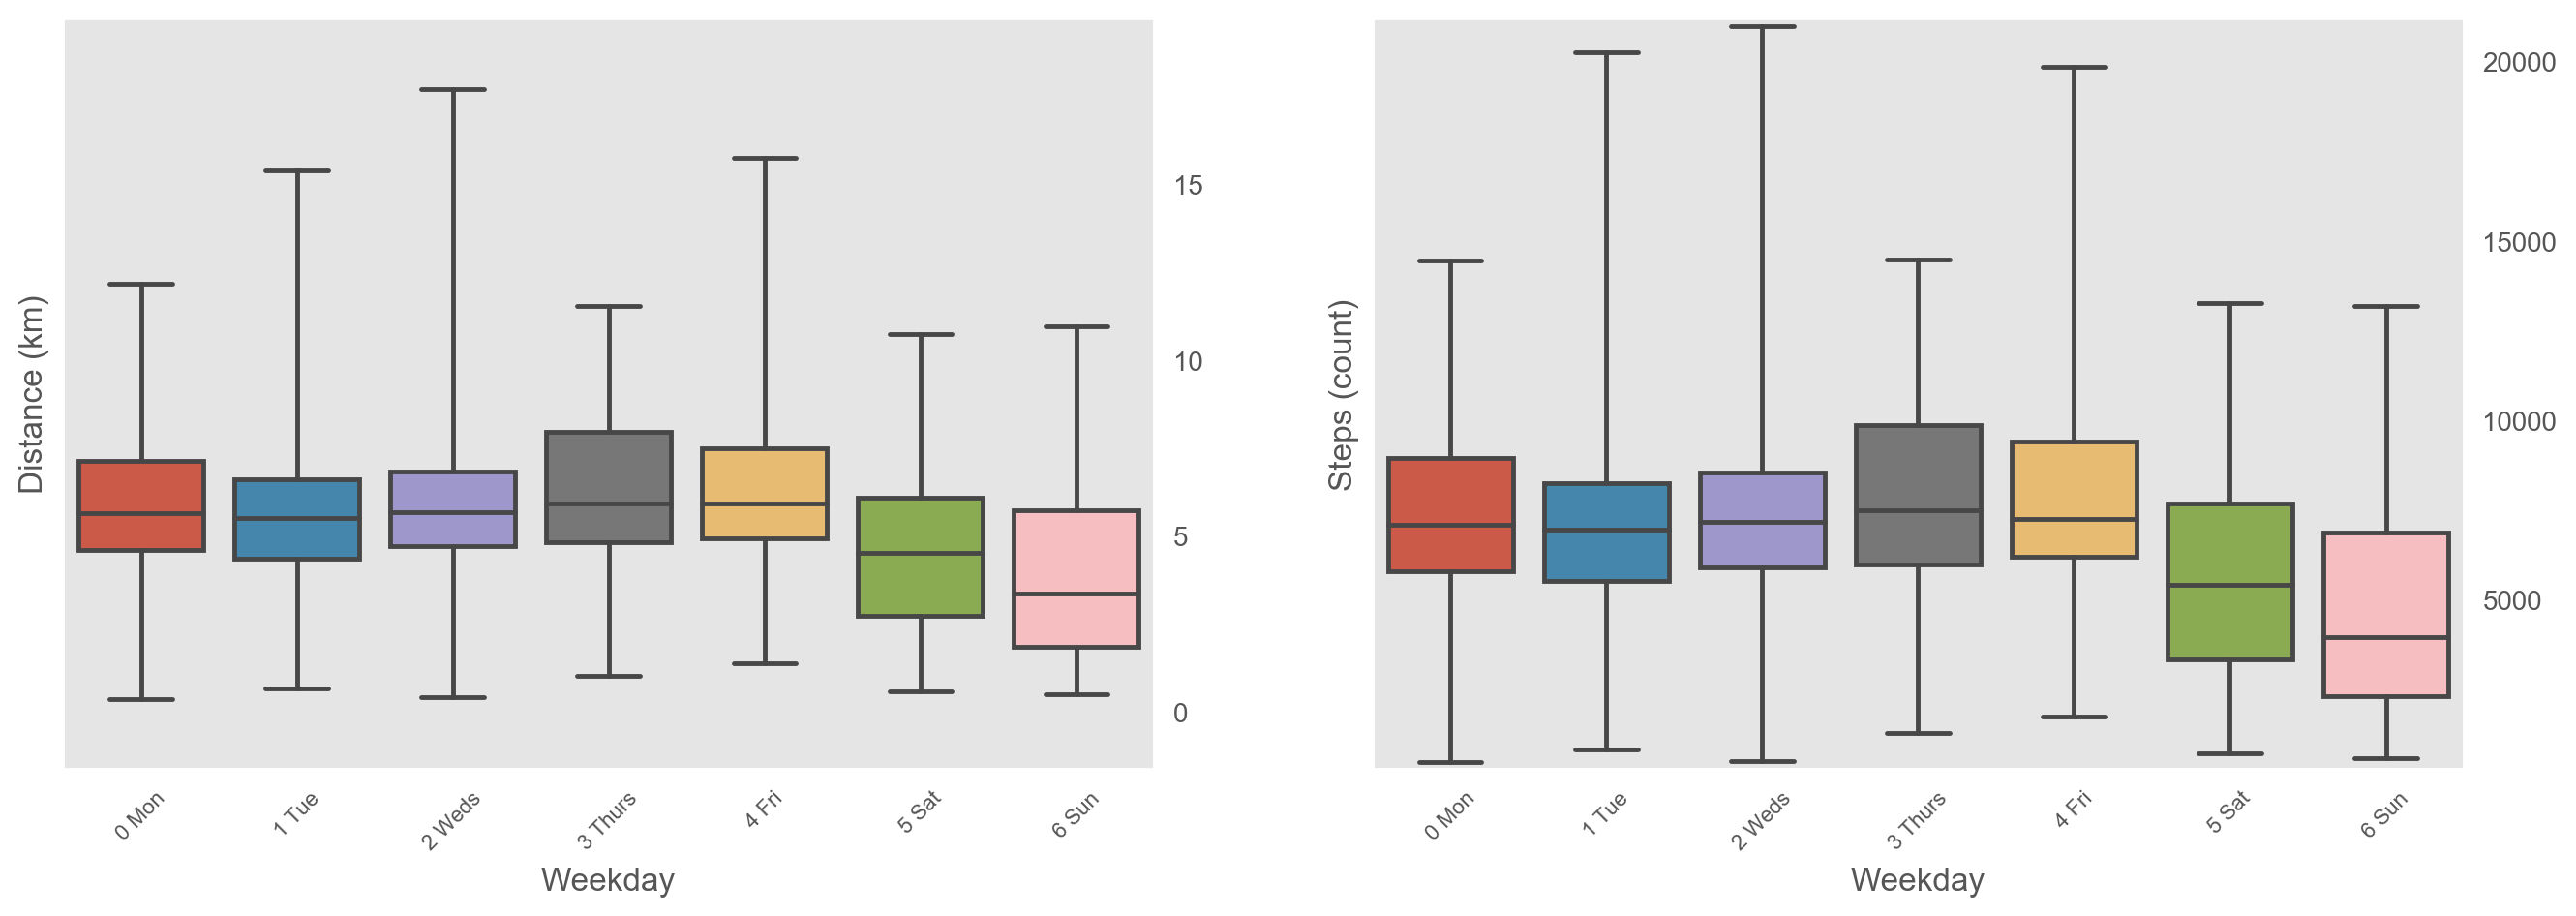

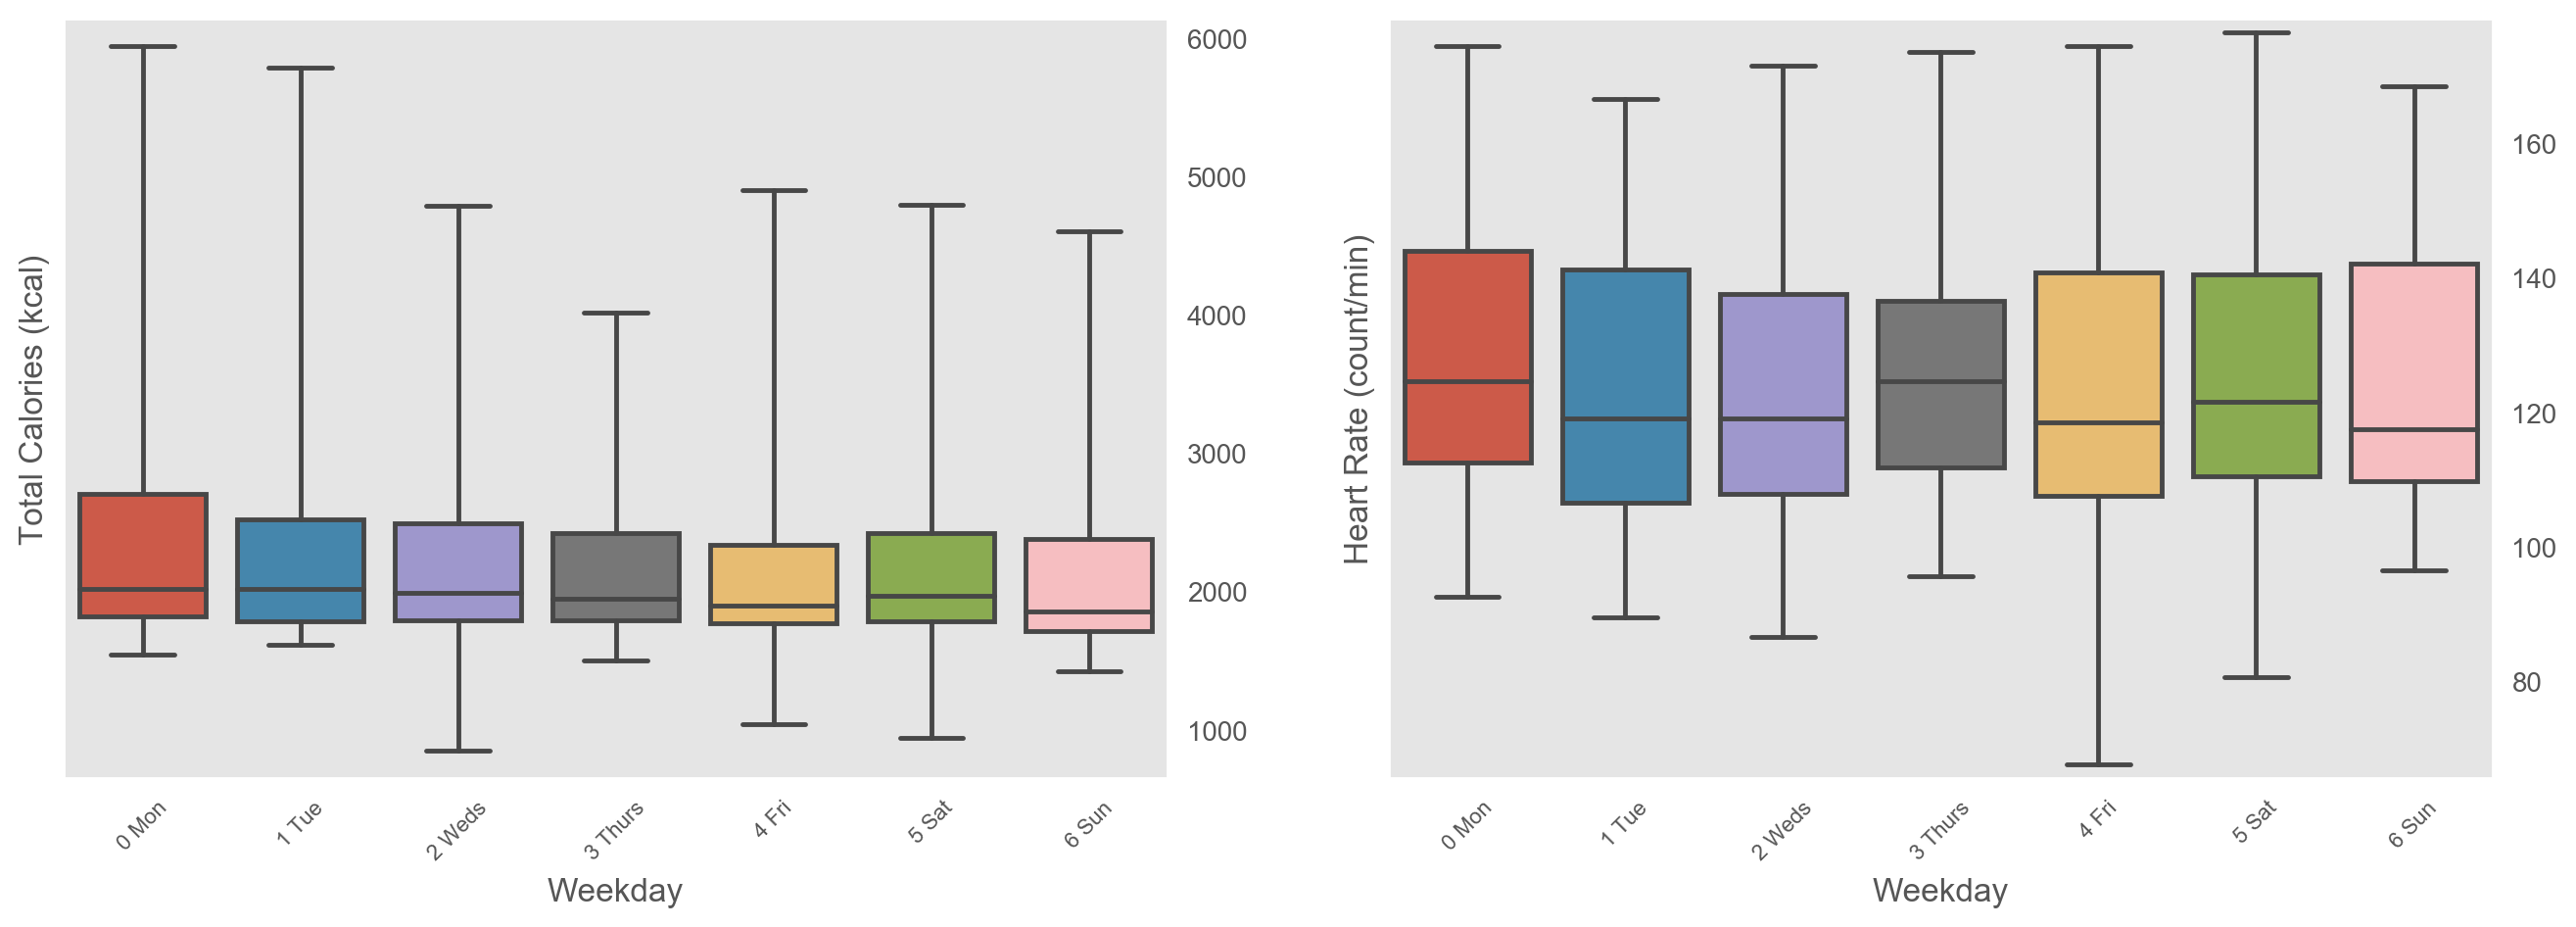

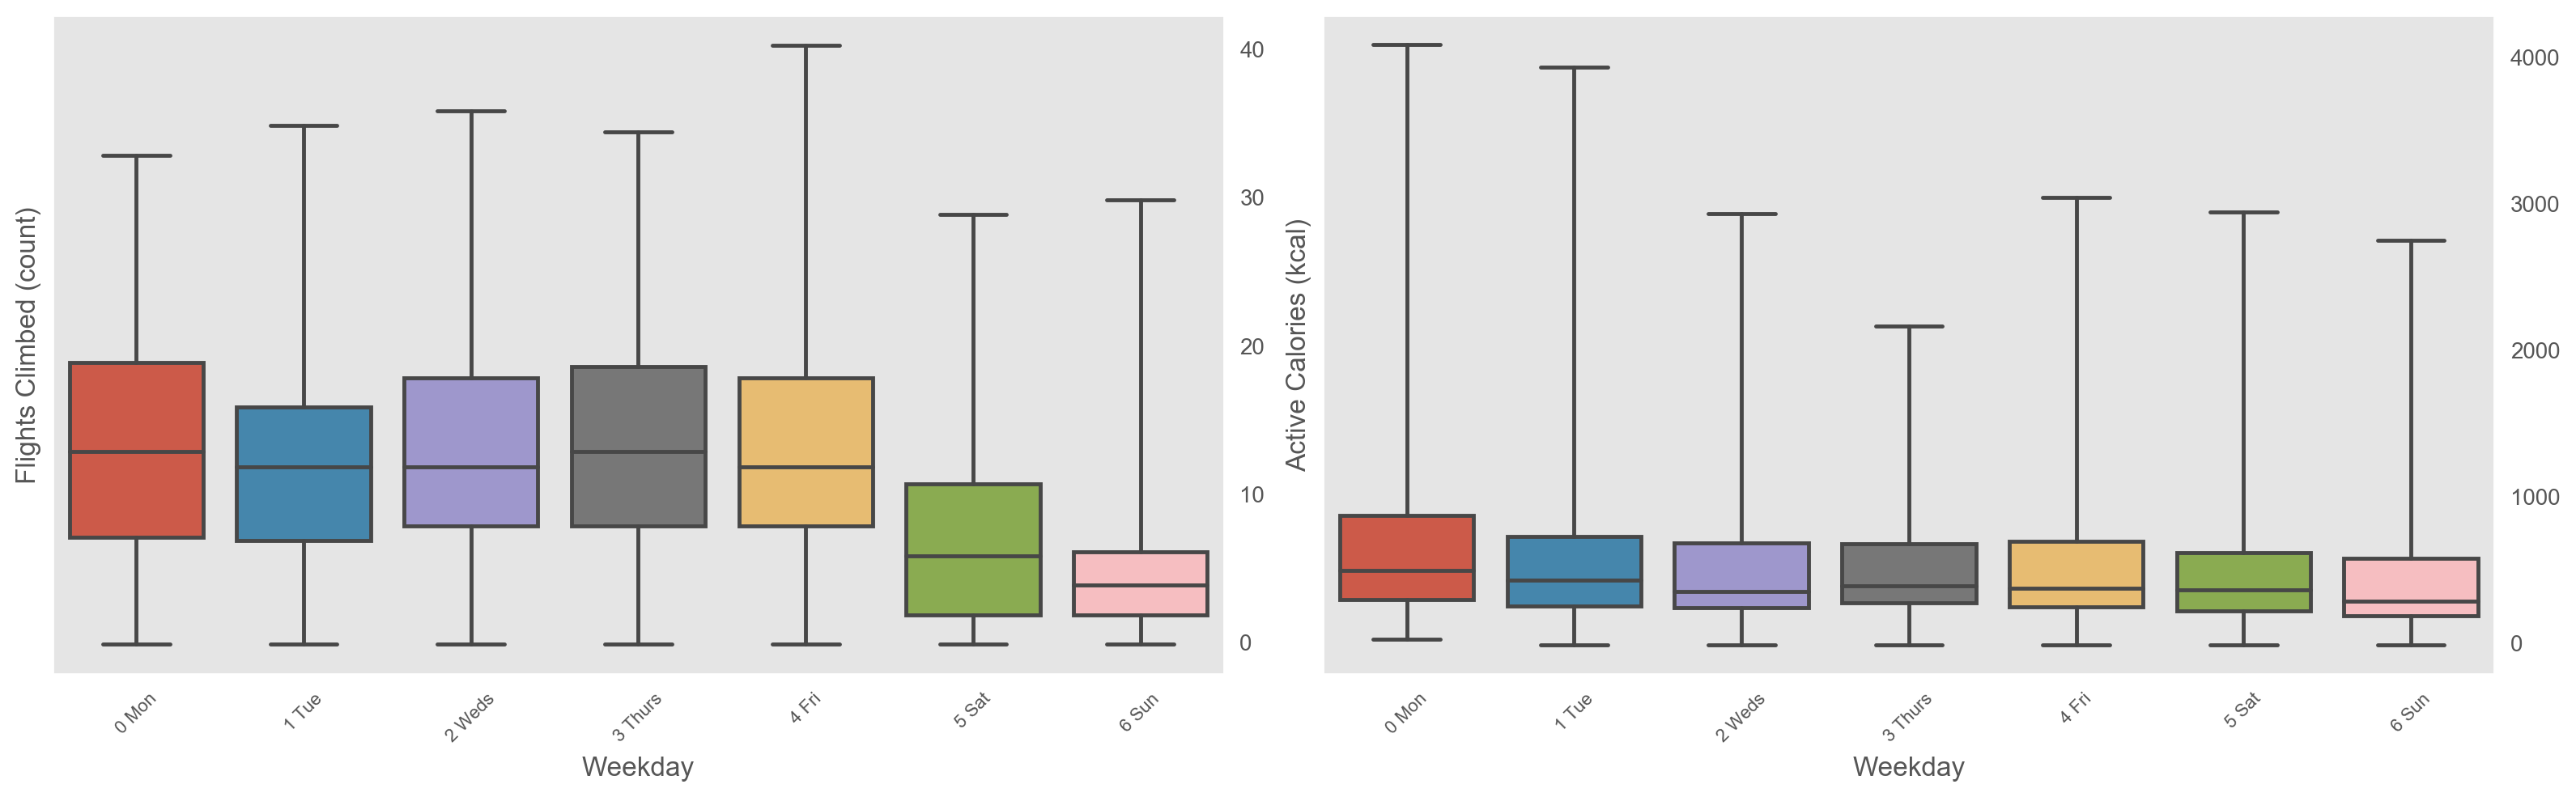

In [28]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
data_for_steps = data_for_steps.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Distance (km)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Distance (km)"].min()-2,data_for_steps["Distance (km)"].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Steps (count)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Steps (count)"].min()-200,data_for_steps["Steps (count)"].max()+200)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(2,figsize=(16,5))
plt.subplot(121)
data_for_cal = data_for_cal.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Total Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Total Calories (kcal)'].min()-200,data_for_cal['Total Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
data_for_hr = data_for_hr.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Heart Rate (count/min)", data=data_for_hr, whis=[0,100],)
ax5.set_ylim(data_for_hr['Heart Rate (count/min)'].min()-2,data_for_hr['Heart Rate (count/min)'].max()+2)
ax5.set_xticklabels(data_for_hr['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(3,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x="Weekday", y="Flights Climbed (count)", data=data_for_steps, whis=[0,100])
ax5.set_ylim(data_for_steps['Flights Climbed (count)'].min()-2,data_for_steps['Flights Climbed (count)'].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Active Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Active Calories (kcal)'].min()-200,data_for_cal['Active Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

In [29]:
#hourly steps by weekday & hourly steps by weekend
steps_intraday = steps_intraday.sort("Hour")
steps_intraday.head()

Start             Finish  Steps (count)        Date  \
Start                                                                         
2016-03-05  05-Mar-2016 00:00  05-Mar-2016 01:00     340.000000  2016-03-05   
2017-01-01  01-Jan-2017 00:00  01-Jan-2017 01:00      65.602565  2017-01-01   
2015-11-04  04-Nov-2015 00:00  04-Nov-2015 01:00    2912.000000  2015-11-04   
2016-01-30  30-Jan-2016 00:00  30-Jan-2016 01:00      63.000000  2016-01-30   
2016-11-26  26-Nov-2016 00:00  26-Nov-2016 01:00      59.000000  2016-11-26   

                Hour Weekday  
Start                         
2016-03-05  00:00:00   5 Sat  
2017-01-01  00:00:00   6 Sun  
2015-11-04  00:00:00  2 Weds  
2016-01-30  00:00:00   5 Sat  
2016-11-26  00:00:00   5 Sat

In [30]:
g = sns.FacetGrid(steps_intraday, row="Weekday", col="Hour", size=3, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=10, color="blue")

In [31]:
#Average steps per hour per day
steps_avg = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.mean)
steps_avg

Steps (count)                                                      \
Weekday          0 Mon        1 Tue       2 Weds      3 Thurs        4 Fri   
Hour                                                                         
00:00:00     26.866708    64.472443   329.365268    19.928611    72.373424   
01:00:00     20.000000   220.666667    29.250000    52.920853    71.000000   
02:00:00           NaN    20.000000          NaN     8.213791    45.666667   
03:00:00     24.000000          NaN    21.666667     7.298034   859.000000   
04:00:00      9.000000          NaN     8.000000          NaN  1089.000000   
05:00:00     90.493044   142.778036    71.988919    78.000000   815.000000   
06:00:00    386.233397   582.044477   479.002295   321.963859   305.324192   
07:00:00   1543.581635  1533.434546  1417.590388  1481.783829  1446.254826   
08:00:00    282.226914   365.496874   299.256814   418.383015   413.492361   
09:00:00    287.715877   333.307848   437.487175   267.653898   386.529862   
10:00:00    382.435004   413.430454   381.596310   371.740774   535.181543   
11:00:00    344.267869   475.211460   402.351245   467.908806   461.743857   
12:00:00    989.553793   983.459355   967.287963   973.746744  1088.789655   
13:00:00    767.439570   818.066481   682.881434   801.844176   682.312892   
14:00:00    270.857451   534.281809   333.847980   441.718512   443.176576   
15:00:00    424.502952   293.294560   429.571547   351.589487   362.484596   
16:00:00    455.289036   355.884985   305.228623   432.212485   275.596885   
17:00:00    399.022104   377.126619   464.624108   411.661430   379.149554   
18:00:00   1168.931369  1276.497558  1244.935414  1246.698456  1135.530669   
19:00:00    601.785957   369.636223   652.480040   712.783573   660.564105   
20:00:00    287.874343   266.452317   383.983717   531.676352   450.984951   
21:00:00    307.979431   116.789110   288.129692   328.406971   297.045607   
22:00:00    149.648813   151.244456   125.233493   293.076415   272.755282   
23:00:00     59.940587   181.899217   139.396186   149.677369   274.402245   

                                    
Weekday         5 Sat        6 Sun  
Hour                                
00:00:00   162.311178   471.194766  
01:00:00   207.203822   236.675877  
02:00:00   303.602423   528.000000  
03:00:00   210.119104    42.000000  
04:00:00   498.500000    31.000000  
05:00:00   190.000000    46.000000  
06:00:00   377.440453   123.000000  
07:00:00  1479.319741  1045.000000  
08:00:00   133.574115   228.724923  
09:00:00   316.048986    91.574744  
10:00:00   343.460543   255.721338  
11:00:00   475.121255   362.564368  
12:00:00   827.446344   759.667405  
13:00:00   684.773793   672.367731  
14:00:00   756.078332   625.110251  
15:00:00   573.458792   599.326319  
16:00:00   730.786837   558.270958  
17:00:00   488.724543   636.212522  
18:00:00   520.370623   654.671322  
19:00:00   558.454391   233.376550  
20:00:00   554.603746   243.712631  
21:00:00   413.415416   253.463787  
22:00:00   251.261126   180.090005  
23:00:00   327.909568   208.586956

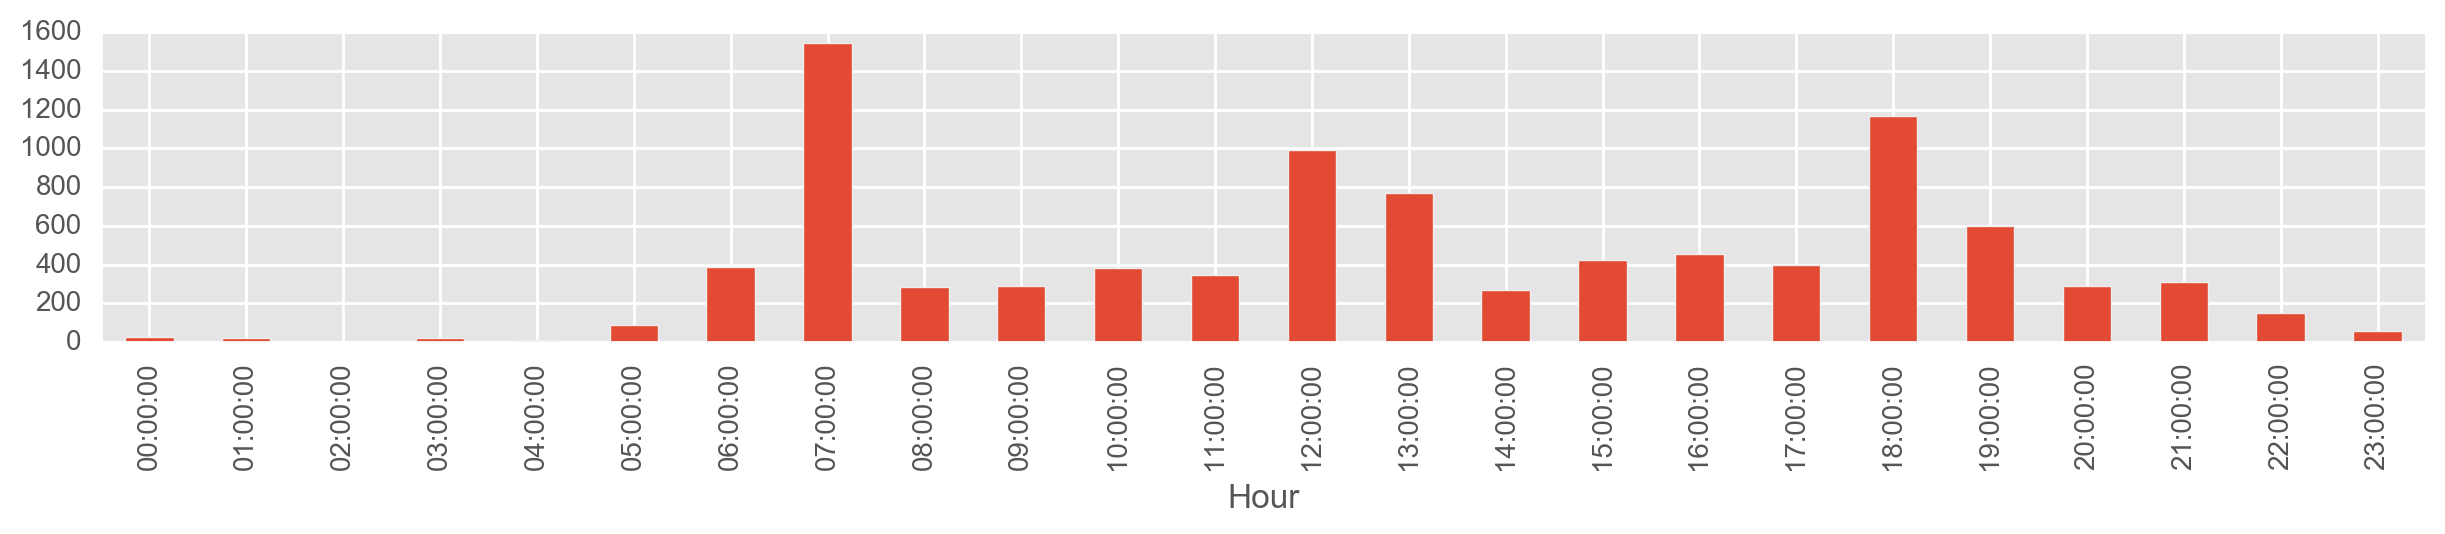

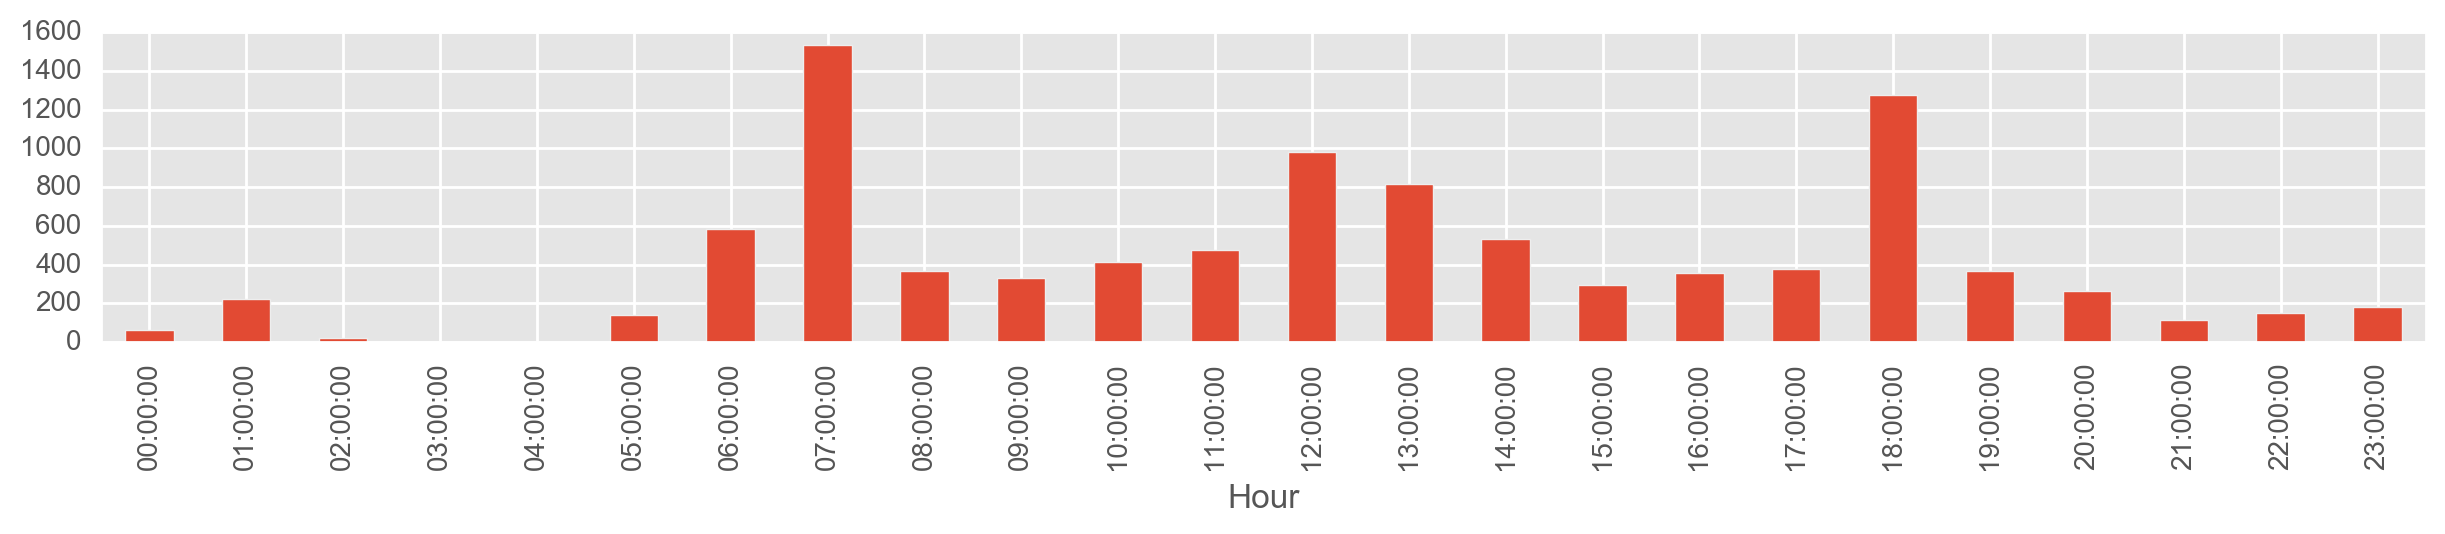

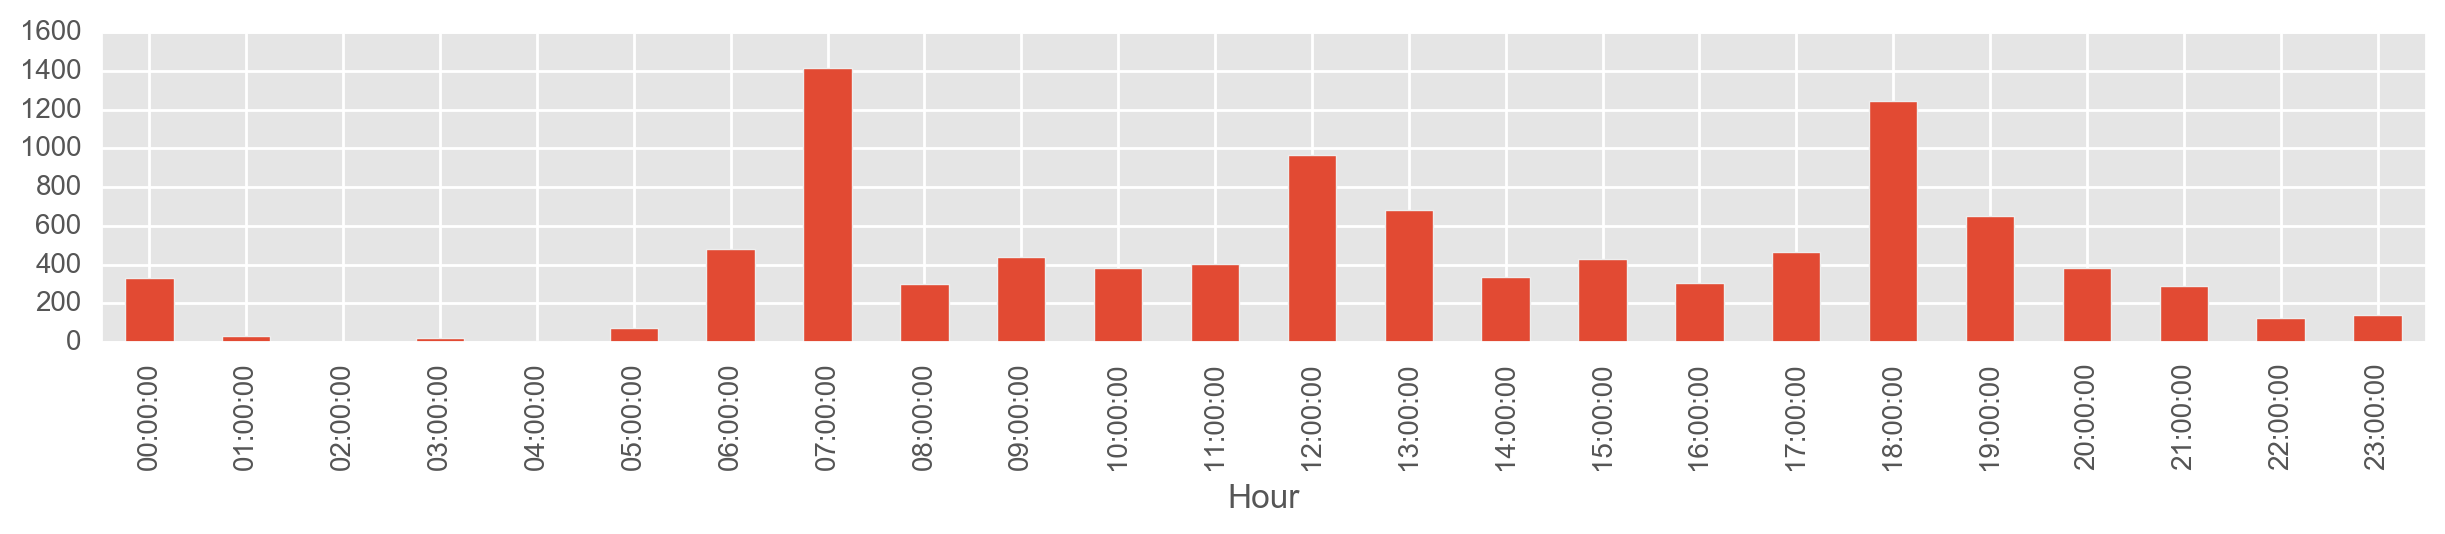

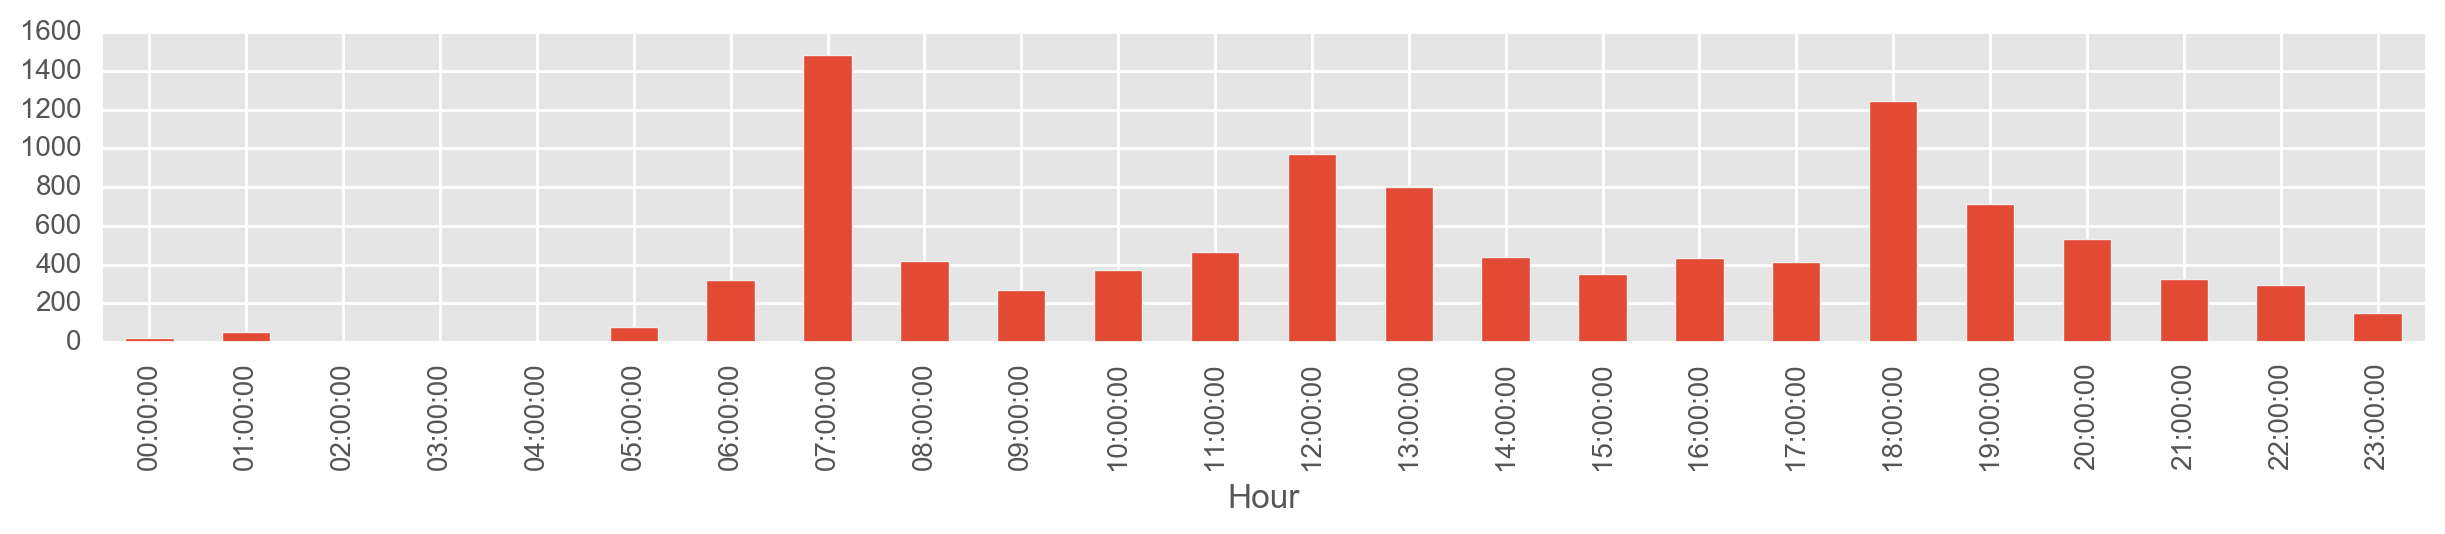

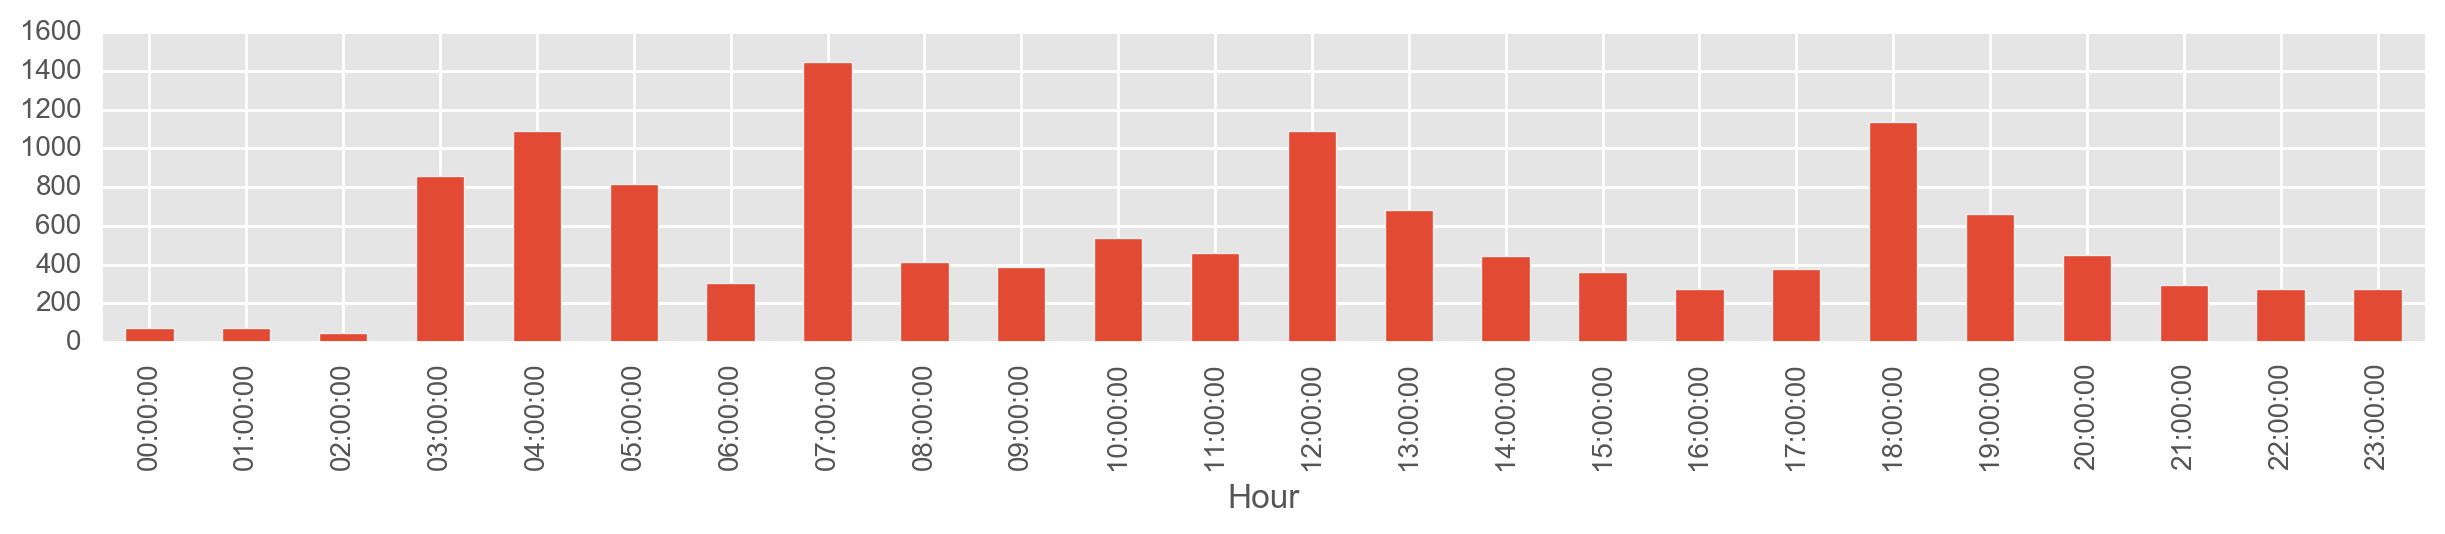

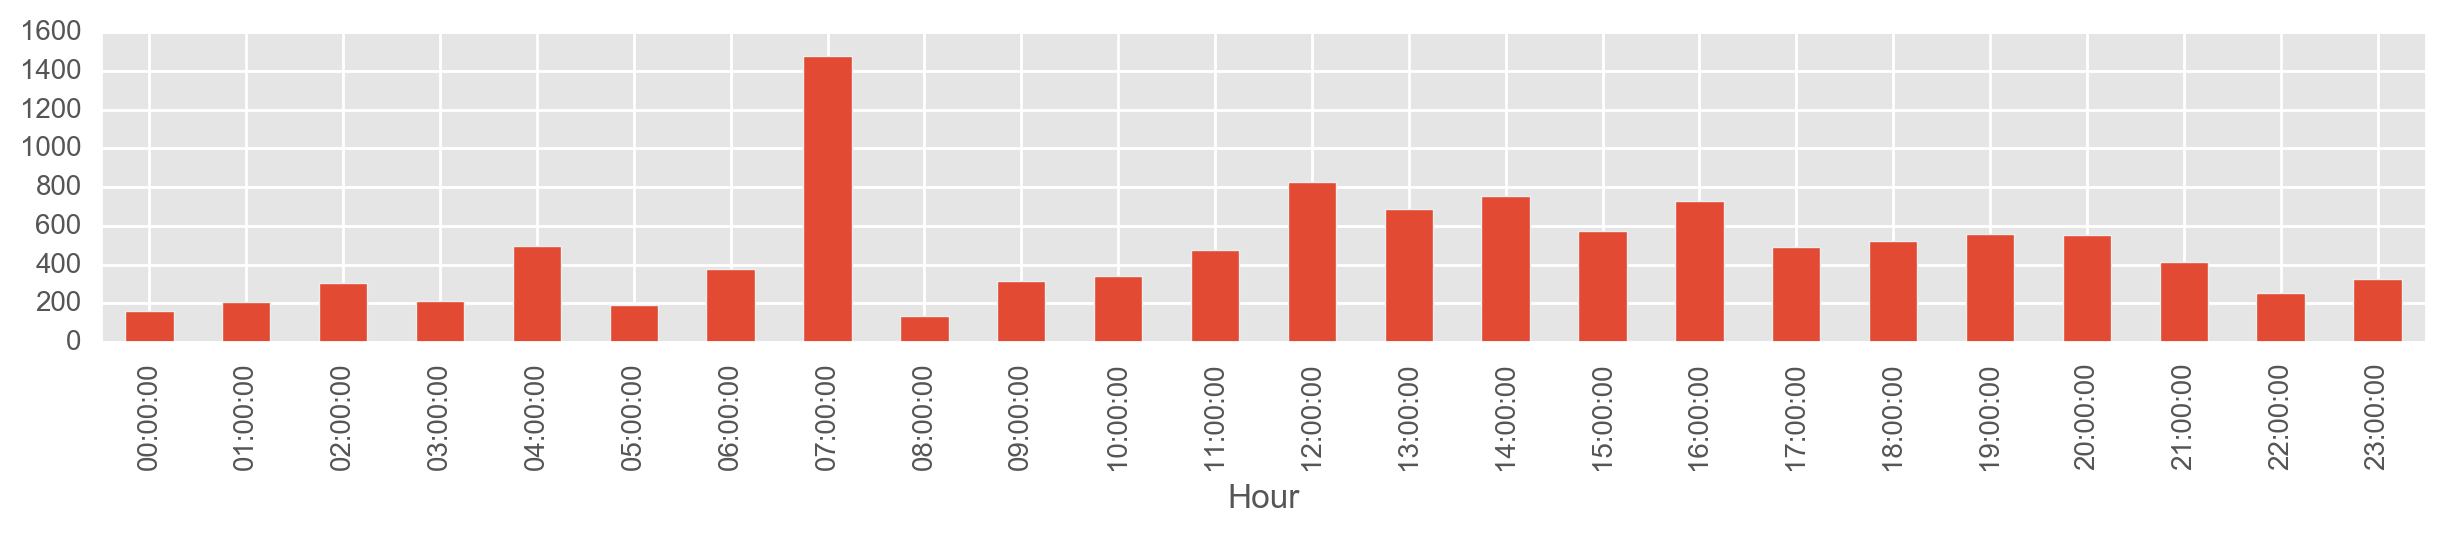

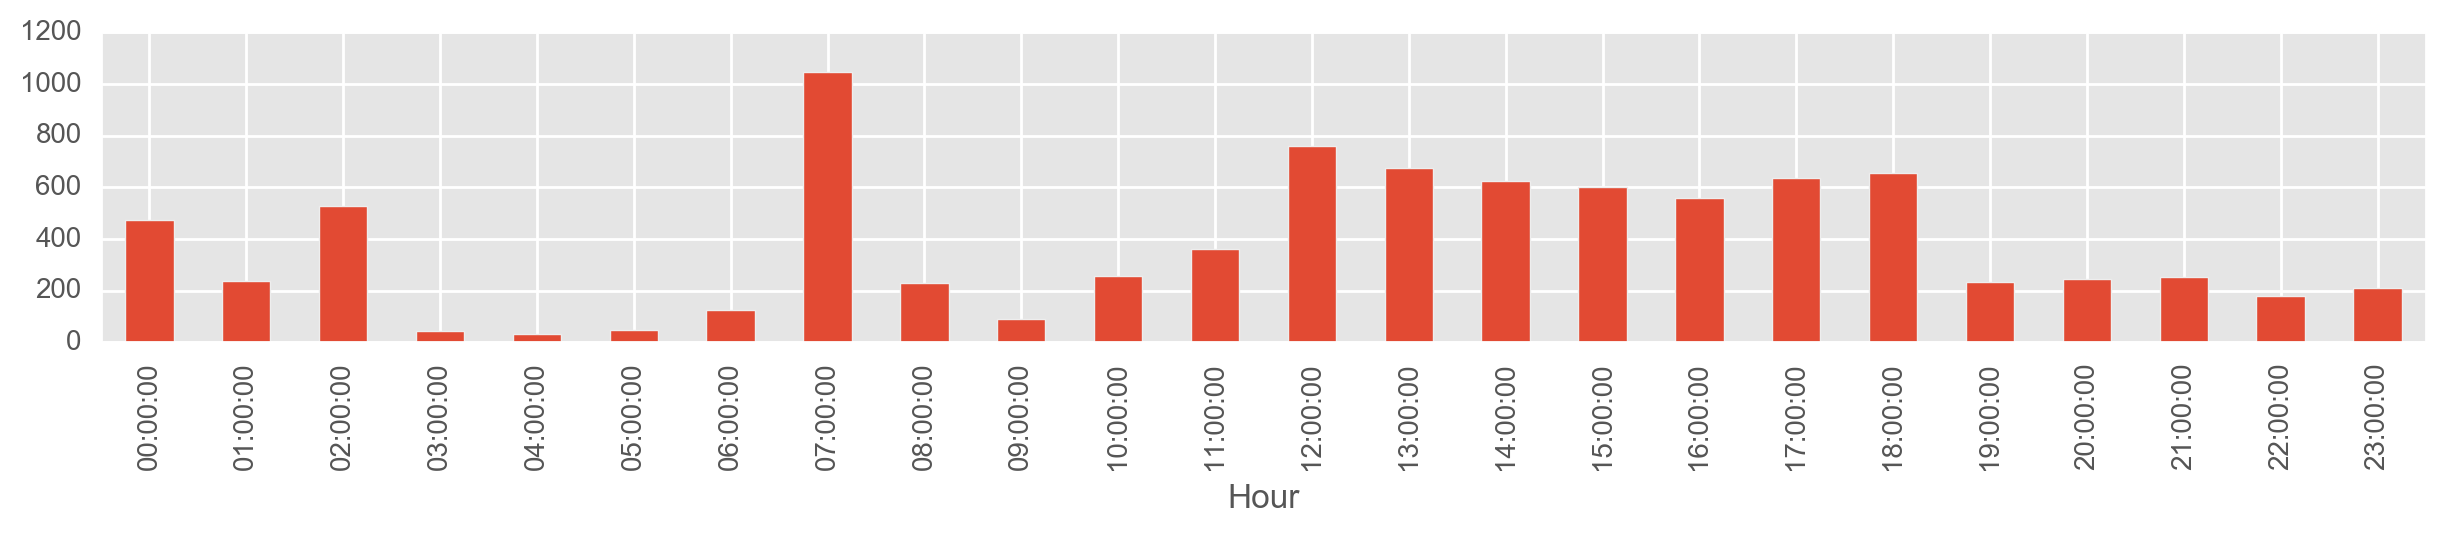

In [32]:
a = steps_avg.transpose()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["0 Mon"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["1 Tue"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["2 Weds"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["3 Thurs"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["4 Fri"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["5 Sat"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["6 Sun"].plot.bar()

In [33]:
#Total steps done per hour since 25 Sept 2015
steps_sum = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.sum)
steps1 = steps_sum.round(2)
steps1

Steps (count)                                                    \
Weekday          0 Mon     1 Tue    2 Weds   3 Thurs     4 Fri     5 Sat   
Hour                                                                       
00:00:00        241.80    451.31   3293.65    219.21    361.87   3733.16   
01:00:00         20.00    662.00    117.00    158.76     71.00   1657.63   
02:00:00           NaN     60.00       NaN     24.64    137.00   1518.01   
03:00:00         24.00       NaN     65.00     14.60   1718.00    630.36   
04:00:00          9.00       NaN     16.00       NaN   1089.00    997.00   
05:00:00        271.48    428.33    143.98    234.00    815.00    190.00   
06:00:00       9269.60  13969.07  12933.06   8693.02   7022.46   1509.76   
07:00:00      87984.15  93539.51  89308.19  85943.46  82436.53  10355.24   
08:00:00      12135.76  16447.36  13167.30  15898.55  14885.72    935.02   
09:00:00      12659.50  17665.32  19249.44  12044.43  18553.43   5688.88   
10:00:00      17592.01  23565.54  18698.22  16356.59  25688.71  10990.74   
11:00:00      18590.46  25186.21  21726.97  21523.81  23548.94  19004.85   
12:00:00      63331.44  59007.56  62873.72  54529.82  59883.43  38062.53   
13:00:00      42209.18  45811.72  42338.65  43299.59  39574.15  31499.59   
14:00:00      14084.59  29919.78  16692.40  22969.36  23488.36  32511.37   
15:00:00      22923.16  13491.55  24915.15  21095.37  19211.68  28099.48   
16:00:00      24585.61  19217.79  16787.57  24203.90  13504.25  32885.41   
17:00:00      25537.41  21496.22  26483.57  23464.70  20853.23  19548.98   
18:00:00      81825.20  82972.34  79675.87  81035.40  68131.84  24457.42   
19:00:00      32496.44  20329.99  37843.84  40628.66  34349.33  26805.81   
20:00:00      14681.59  11990.35  19199.19  23393.76  20745.31  24957.17   
21:00:00      13859.07   5021.93  11813.32  13464.69  13367.05  16950.03   
22:00:00       5387.36   5142.31   4633.64   8206.14  10637.46  10804.23   
23:00:00       1498.51   5638.88   3624.30   3741.93   7957.67  11148.93   

                    
Weekday      6 Sun  
Hour                
00:00:00  12722.26  
01:00:00   3076.79  
02:00:00    528.00  
03:00:00    126.00  
04:00:00     31.00  
05:00:00     46.00  
06:00:00    246.00  
07:00:00   4180.00  
08:00:00   1829.80  
09:00:00   1739.92  
10:00:00   8183.08  
11:00:00  12689.75  
12:00:00  31906.03  
13:00:00  29584.18  
14:00:00  28129.96  
15:00:00  28168.34  
16:00:00  26238.74  
17:00:00  28629.56  
18:00:00  28150.87  
19:00:00  10035.19  
20:00:00  10235.93  
21:00:00   9378.16  
22:00:00   4682.34  
23:00:00   6049.02

In [35]:
#Average Heart Rate per hour since 11 Mar 2016
hr_avg = pd.pivot_table(hr_intraday2, index=["Hour"], columns = ['Weekday'], aggfunc={np.median,np.mean})
hr_avg = hr_avg.round(2)
hr_avg

Heart Rate (count/min)                                             \
                         median                                              
Weekday                   0 Mon  1 Tue 2 Weds 3 Thurs  4 Fri  5 Sat  6 Sun   
Hour                                                                         
00:00:00                   84.0   75.0   79.0    76.0   79.0   78.5   88.0   
01:00:00                   76.0   63.5   61.0    71.0   71.5   72.5   80.0   
02:00:00                   64.0   64.5   61.0    62.5   73.0   65.0   63.0   
03:00:00                   60.0   58.0   61.0    60.0   69.0   64.0   68.0   
04:00:00                   61.0   61.0   63.5    63.0   62.0   63.0   62.0   
05:00:00                   63.0   65.0   63.0    62.5   67.0   63.0   61.0   
06:00:00                  101.5   99.5   71.0    72.0   86.0   64.0   62.0   
07:00:00                  114.0  110.5  111.5   103.0  113.0   67.0   73.0   
08:00:00                   96.0   94.0   94.0    93.0   98.0   76.5   82.0   
09:00:00                   91.0   93.0   90.0    85.0   97.0   88.5   84.0   
10:00:00                   90.0   91.5   89.0    88.0   94.0   94.5   87.0   
11:00:00                   91.0   93.5   87.5    91.0   93.5   97.5   96.0   
12:00:00                  104.5  102.0   99.0    94.0  101.5   97.0   94.5   
13:00:00                  102.0  105.0  107.0   103.0  104.0   99.0   97.5   
14:00:00                  103.5  102.0   99.0   100.0  103.5   99.0  102.0   
15:00:00                  102.0  101.0   97.0    98.0   97.0  102.5  103.5   
16:00:00                   99.0   98.0   99.0    94.0  102.0  104.0  101.0   
17:00:00                   98.0   98.0   94.0    94.0   97.0   96.5   99.0   
18:00:00                  104.0  102.5   99.0   102.0   99.0   97.0   96.0   
19:00:00                  101.5   94.0   99.5    95.0   99.0   98.0   97.0   
20:00:00                   96.0   91.5   94.0    97.0   92.5   98.5   94.0   
21:00:00                   97.0   91.0   91.0    94.0   97.0   97.0   92.0   
22:00:00                   90.5   90.0   90.0    90.0   90.0   92.0   87.0   
23:00:00                   85.5   83.5   82.0    86.0   87.5   90.0   82.0   

                                                                  
            mean                                                  
Weekday    0 Mon   1 Tue  2 Weds 3 Thurs   4 Fri   5 Sat   6 Sun  
Hour                                                              
00:00:00   86.42   81.19   83.08   80.96   82.20   84.75   92.67  
01:00:00   73.00   64.83   68.44   70.89   72.33   80.42   84.43  
02:00:00   64.33   64.00   69.00   63.60   72.25   74.78   68.43  
03:00:00   60.71   59.20   64.56   63.86   67.40   70.38   67.88  
04:00:00   61.57   60.50   63.00   62.00   63.40   68.38   69.00  
05:00:00   72.00   68.40   74.00   64.12   67.25   70.71   68.75  
06:00:00   96.67   97.75   81.00   76.25   95.20   65.33   69.38  
07:00:00  111.19  111.62  109.75  108.11  109.69   78.89   81.56  
08:00:00   96.40   95.56   94.21   94.49   99.18   77.79   80.13  
09:00:00   94.10   96.08   91.20   88.68   97.51   89.33   82.65  
10:00:00   93.40   95.39   92.28   91.51   94.64   94.31   87.57  
11:00:00   96.80   96.55   88.80   95.27   96.00  101.47   95.21  
12:00:00  106.60  105.86  102.10   98.97  105.08  100.86  101.25  
13:00:00  106.17  106.05  106.46  105.03  104.54  105.62  100.71  
14:00:00  104.05  104.37  103.29  106.05  106.72  103.85  102.07  
15:00:00  104.42   99.09  100.83  101.05  101.70  105.47  103.79  
16:00:00  102.38  102.95  101.38   97.71  102.19  104.78  102.12  
17:00:00  100.29   98.24   99.41   99.35  101.95  100.78  101.52  
18:00:00  109.48  104.91  103.77  108.92  103.42   99.86  101.72  
19:00:00  104.89   97.46  102.32  100.62  104.28  103.84   97.46  
20:00:00  100.86   95.00   98.80   99.56   93.79  104.37   96.60  
21:00:00   98.81   96.33   92.95   95.54   98.12  100.49   93.46  
22:00:00   96.75   90.59   92.43   92.61   95.30   96.27   92.09  
23:00:00   86.8

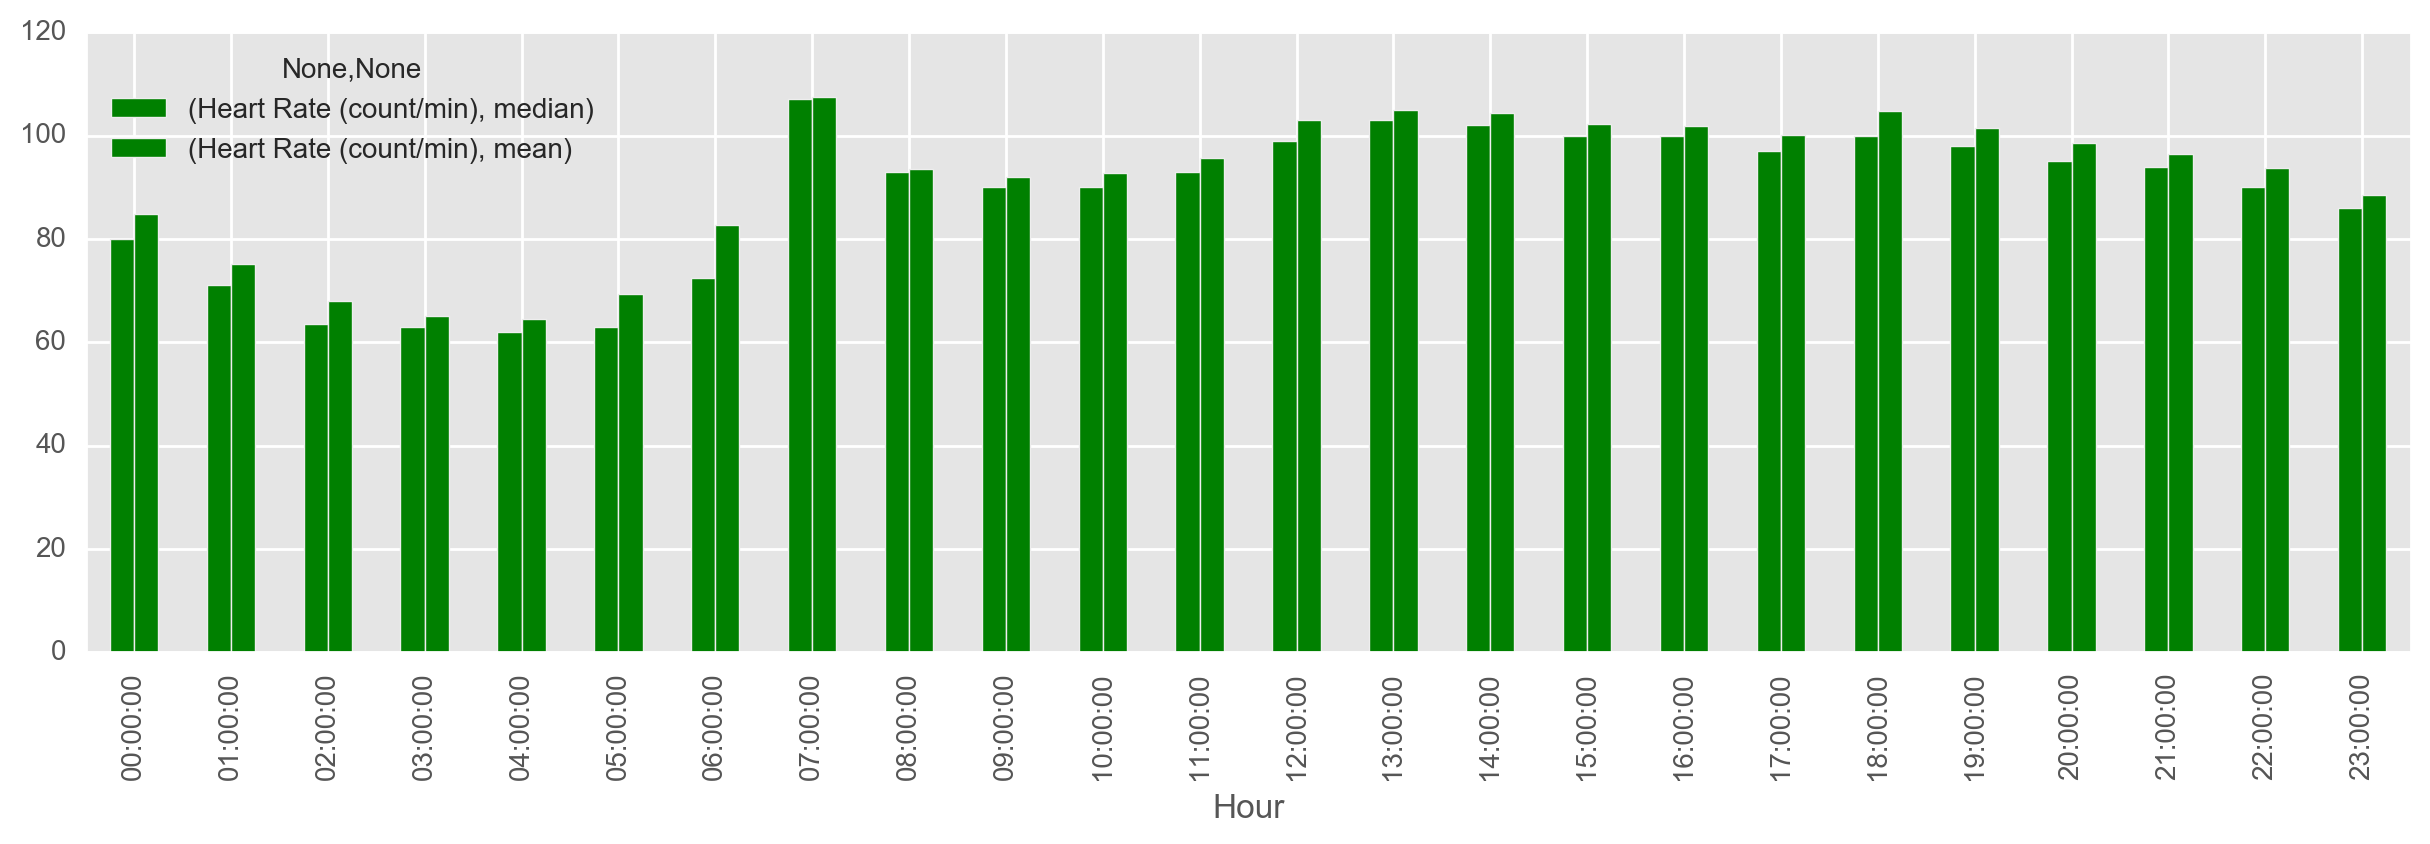

In [106]:
#Average Heart Rate per Hour Chart
a1 = hr_intraday2.groupby("Hour").agg({np.mean,np.median})
mean = hr_intraday2.groupby("Hour").agg(np.mean)
#plt.fig(figsize=(15,2))
a1.plot.bar(color='g',figsize=(15,4))